In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import os
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', None)

# Which Months

In [4]:
Monthsinc= '04_20-07_22'

# Amazon Subs (Importing, Merging, Transforming)

In [5]:
SFilepath='C:/Users/sortiz/Onedrive - Cinedigm/Databases/SVOD/Amazon SVOD DB/Amazon Subs/'

Channels = ['Screambox', 'Docurama', 'CONtv', 'Dove Channel']
CountryF = ['US','UK']

In [6]:
#importing Subs for all subs except Fandor

lists = {'2020-04':'2020','2020-05':'2020','2020-06':'2020','2020-07':'2020','2020-08':'2020','2020-09':'2020','2020-10':'2020','2020-11':'2020','2020-12':'2020',
         '2021-01':'2021','2021-02':'2021','2021-03':'2021','2021-04':'2021','2021-05':'2021','2021-06':'2021','2021-07':'2021','2021-08':'2021','2021-09':'2021','2021-10':'2021','2021-11':'2021','2021-12':'2021',
         '2022-01':'2022','2022-02':'2022','2022-03':'2022','2022-04':'2022','2022-05':'2022','2022-06':'2022','2022-07':'2022'}
l=[]

for i in Channels: 
    for key,value in lists.items():
        l = l + [SFilepath + i +'/' + value + '/subs_m_US_' + i + '_' + key + '.csv']
        

In [7]:
#importing Subs for Fandor (Since UK data is always late)

listsF = {'2020-04':'2020','2020-05':'2020','2020-06':'2020','2020-07':'2020','2020-08':'2020','2020-09':'2020','2020-10':'2020','2020-11':'2020','2020-12':'2020',
         '2021-01':'2021','2021-02':'2021','2021-03':'2021','2021-04':'2021','2021-05':'2021','2021-06':'2021','2021-07':'2021','2021-08':'2021','2021-09':'2021','2021-10':'2021','2021-11':'2021','2021-12':'2021',
         '2022-01':'2022','2022-02':'2022','2022-03':'2022','2022-04':'2022','2022-05':'2022','2022-06':'2022','2022-07':'2022'}
lF=[]

for i in CountryF: 
    for key,value in listsF.items():
        lF = lF + [SFilepath + 'Fandor/' + i +'/' + value + '/subs_m_' + i + '_' + 'Fandor' + '_' + key + '.csv']
        

In [8]:
dfsubs = pd.concat([pd.read_csv(file) for file in l]).reset_index()
dfsubs= dfsubs.loc[dfsubs['Subscription Category']== 'HO',('Report Start','Subscription','Billing Amount','Active Subscriptions')]

In [9]:
dfFsubs = pd.concat([pd.read_csv(file) for file in lF]).reset_index()
# Fandor_last= pd.read_csv(SFilepath + 'Fandor/US/2022/subs_m_US_Fandor_2022-04.csv')
# dfFsubs = pd.concat([dfFsubs, Fandor_last])

dfFsubs= dfFsubs.loc[dfFsubs['Subscription Category']== 'HO',('Report Start','Subscription','Billing Amount','Active Subscriptions')]
dfFsubs['Subscription']='Fandor'
dfFsubs= dfFsubs.groupby(by=['Report Start','Subscription']).agg(sum).reset_index()
dfFsubs['Billing Amount']= 3.99

In [10]:
Amz_subs= pd.concat([dfsubs,dfFsubs]).reset_index()
Amz_subs.rename(columns={'Active Subscriptions':'Amazon Paid Subs'}, inplace=True)
Amz_subs['Report Start']= pd.to_datetime(Amz_subs['Report Start'])
Amz_subs.loc[Amz_subs['Subscription']=='Dove Channel', 'Subscription'] = 'Dove'

In [11]:
Amz_subs.head(200)

,index,Report Start,Subscription,Billing Amount,Amazon Paid Subs
0,1,2020-04-01,Screambox,4.99,4525
1,3,2020-05-01,Screambox,4.99,4717
2,5,2020-06-01,Screambox,4.99,5103
3,7,2020-07-01,Screambox,4.99,5078
4,9,2020-08-01,Screambox,4.99,4906
5,11,2020-09-01,Screambox,4.99,5022
6,13,2020-10-01,Screambox,4.99,5265
7,15,2020-11-01,Screambox,4.99,5654
8,17,2020-12-01,Screambox,4.99,7030
9,19,2021-01-01,Screambox,4.99,8785


# Roku Subs (Importing, Transforming)

In [12]:
Rok_subs= pd.read_csv('C://Users/sortiz/OneDrive - Cinedigm/Databases/SVOD/Roku SVOD DB/Roku Subs.csv')

In [13]:
Rok_subs['Date Key']=pd.to_datetime(Rok_subs['Date Key'])
Rok_subs.rename(columns={'Date Key':'Report Start','Provider Product ID':'Subscription','Total Active Paid End Users':'Roku Paid Subs'}, inplace=True)

In [14]:
Rok_subs.head(10)

,Report Start,Subscription,Total New Paid End Users,Total New Free Trial End Users,Total Canceled Users,Roku Paid Subs,Total Active end Users,Total Active Free Trial End Users,Total Service Viewers,Trial End Conversion Rate,Churn Rate
0,2020-04-01,CONtv,157,3586,1394,1208,3727,2519,3897,53.60%,18.00%
1,2020-05-01,CONtv,1493,2713,2789,2279,3683,1404,2939,32.70%,25.70%
2,2020-06-01,CONtv,993,714,1698,2613,2757,144,1542,36.50%,26.70%
3,2020-07-01,CONtv,409,713,956,2431,2590,159,1272,47.20%,23.00%
4,2020-08-01,CONtv,315,503,786,2232,2314,82,781,49.30%,22.00%
5,2020-09-01,CONtv,170,287,547,2009,2081,72,407,48.20%,18.10%
6,2020-10-01,CONtv,168,354,545,1844,1902,58,406,42.40%,15.90%
7,2020-11-01,CONtv,275,299,467,1833,1867,34,481,41.10%,16.10%
8,2020-12-01,CONtv,494,1001,793,1947,2230,283,1286,44.50%,16.90%
9,2021-01-01,CONtv,650,1182,966,2229,2490,261,1495,48.30%,18.50%


# Merge Subs into one Table 'Subs'

In [15]:
Subs= pd.merge(Amz_subs, Rok_subs.loc[:,('Report Start','Subscription','Roku Paid Subs')], on= ['Report Start', 'Subscription'], how= 'left')

In [16]:
Subs['Year']= Subs['Report Start'].dt.year
Subs['Month(num)']= Subs['Report Start'].dt.month
Subs['Total Paid Subs']=Subs['Amazon Paid Subs']+ Subs['Roku Paid Subs']
Subs['Revenue']= Subs['Billing Amount']* Subs['Total Paid Subs']

In [17]:
Cond=[
    Subs['Month(num)']==1, Subs['Month(num)']==2, Subs['Month(num)']==3, Subs['Month(num)']==4,
    Subs['Month(num)']==5, Subs['Month(num)']==6, Subs['Month(num)']==7, Subs['Month(num)']==8,
    Subs['Month(num)']==9, Subs['Month(num)']==10, Subs['Month(num)']==11, Subs['Month(num)']==12
]
Months_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Subs['Month'] = np.select(Cond,Months_names, default=np.nan)

In [18]:
Subs=Subs.loc[:,('Year','Month(num)','Month','Subscription','Amazon Paid Subs','Roku Paid Subs','Billing Amount','Total Paid Subs','Revenue')]
Subs= Subs.sort_values(by=['Subscription','Year','Month(num)'])

In [19]:
Subs.head(200)

,Year,Month(num),Month,Subscription,Amazon Paid Subs,Roku Paid Subs,Billing Amount,Total Paid Subs,Revenue
56,2020,4,Apr,CONtv,26140,1208,4.99,27348,136466.52
57,2020,5,May,CONtv,27697,2279,4.99,29976,149580.24
58,2020,6,Jun,CONtv,32540,2613,4.99,35153,175413.47
59,2020,7,Jul,CONtv,34989,2431,4.99,37420,186725.80
60,2020,8,Aug,CONtv,35142,2232,4.99,37374,186496.26
61,2020,9,Sep,CONtv,34955,2009,4.99,36964,184450.36
62,2020,10,Oct,CONtv,35633,1844,4.99,37477,187010.23
63,2020,11,Nov,CONtv,36933,1833,4.99,38766,193442.34
64,2020,12,Dec,CONtv,36900,1947,4.99,38847,193846.53
65,2021,1,Jan,CONtv,37155,2229,4.99,39384,196526.16


# Amazon Content Data (Importing, Transforming)

In [20]:
CFilepath='C:/Users/sortiz/Onedrive - Cinedigm/Databases/SVOD/Amazon SVOD DB/Amazon Content/'

Channels = ['Screambox', 'Docurama', 'CONtv', 'Dove Channel']
CountryF = ['US','UK']

In [21]:
#importing Content for all subs except Fandor

cont_lists = {'2020-04':'2020','2020-05':'2020','2020-06':'2020','2020-07':'2020','2020-08':'2020','2020-09':'2020','2020-10':'2020','2020-11':'2020','2020-12':'2020',
         '2021-01':'2021','2021-02':'2021','2021-03':'2021','2021-04':'2021','2021-05':'2021','2021-06':'2021','2021-07':'2021','2021-08':'2021','2021-09':'2021','2021-10':'2021','2021-11':'2021','2021-12':'2021',
         '2022-01':'2022','2022-02':'2022','2022-03':'2022','2022-04':'2022','2022-05':'2022','2022-06':'2022','2022-07':'2022'}
cl=[]

for i in Channels: 
    for key,value in cont_lists.items():
        cl = cl + [CFilepath + i +'/' + value + '/contusg_m_US_' + i + '_' + key + '.csv']
        

In [22]:
#importing Content for Fandor (Since UK data is always late)

cont_listsF = {'2020-04':'2020','2020-05':'2020','2020-06':'2020','2020-07':'2020','2020-08':'2020','2020-09':'2020','2020-10':'2020','2020-11':'2020','2020-12':'2020',
         '2021-01':'2021','2021-02':'2021','2021-03':'2021','2021-04':'2021','2021-05':'2021','2021-06':'2021','2021-07':'2021','2021-08':'2021','2021-09':'2021','2021-10':'2021','2021-11':'2021','2021-12':'2021',
         '2022-01':'2022','2022-02':'2022','2022-03':'2022','2022-04':'2022','2022-05':'2022','2022-06':'2022','2022-07':'2022'}
clF=[]

for i in CountryF: 
    for key,value in cont_listsF.items():
        clF = clF + [CFilepath + 'Fandor/' + i +'/' + value + '/contusg_m_' + i + '_' + 'Fandor' + '_' + key + '.csv']
        

In [23]:
dfcont = pd.concat([pd.read_csv(file) for file in cl]).reset_index()

In [24]:
dfFcont = pd.concat([pd.read_csv(file) for file in clF]).reset_index()
#Fandor_last= pd.read_csv(CFilepath + 'Fandor/US/2022/contusg_m_US_Fandor_2022-04.csv')
#dfFcont = pd.concat([dfFcont, Fandor_last])

In [25]:
dfFcont['Series or Movie Title']= dfFcont['Series or Movie Title'].fillna(dfFcont['Season or Movie Title'])

In [26]:
dfFcont= dfFcont.drop(columns=['Report Date','Season or Movie Title'])

In [27]:
Amz_cont=pd.concat([dfcont,dfFcont])

In [28]:
Amz_cont['Report Start']= pd.to_datetime(Amz_cont['Report Start'])
Amz_cont.loc[Amz_cont['Subscription']=='Dove Channel','Subscription']='Dove'
Amz_cont['Year']= Amz_cont['Report Start'].dt.year
Amz_cont['Month']= Amz_cont['Report Start'].dt.month
Amz_cont= Amz_cont.loc[:,('Year','Month','Subscription','Vendor SKU','Content Type','Series or Movie Title','Total Minutes Streamed','Total Number of Streams')]
Amz_cont.rename(columns={'Vendor SKU':'ID','Content Type':'TV/MOVIE','Series or Movie Title':'Title'}, inplace=True)

#There is multiple titles for the same Year/Month because its broken down by Payment type, as in paid subs vs free trial etc.

Amz_cont= Amz_cont.groupby(by=['Year','Month','Subscription','ID','TV/MOVIE','Title'])[['Total Minutes Streamed','Total Number of Streams']].agg(sum).reset_index()

In [29]:
Amz_cont.loc[Amz_cont['Title'].str.contains('false p',case=False)]

,Year,Month,Subscription,ID,TV/MOVIE,Title,Total Minutes Streamed,Total Number of Streams


In [30]:
Amz_cont['ID']= Amz_cont['ID'].astype(str) 
Amz_cont['Title']= Amz_cont['Title'].astype(str) 
Amz_cont['Subscription']= Amz_cont['Subscription'].astype(str) 
Amz_cont['TV/MOVIE']= Amz_cont['TV/MOVIE'].astype(str) 

In [31]:
# Amz_cont.loc[Amz_cont['Title'].str.contains('the collector',case=False),'ID']='883476025872'
# Amz_cont.loc[Amz_cont['Title'].str.contains('A Turtle\'s Tale',case=False),'ID']='883476075594'

In [32]:
ACo=Amz_cont.loc[Amz_cont['ID'].str[:3]=='008'].drop_duplicates()

In [33]:
ACo['ID2']= ACo['ID'].str[2:]

In [34]:
ACo

,Year,Month,Subscription,ID,TV/MOVIE,Title,Total Minutes Streamed,Total Number of Streams,ID2
1,2020,4,CONtv,00883476003771,TV,Super Mario Bros. Super Show,1650.25,149,883476003771
2,2020,4,CONtv,00883476003788,TV,Super Mario Bros. Super Show,1058.47,80,883476003788
3,2020,4,CONtv,00883476003795,TV,Super Mario Bros. Super Show,841.82,69,883476003795
4,2020,4,CONtv,00883476003801,TV,Super Mario Bros. Super Show,760.54,52,883476003801
5,2020,4,CONtv,00883476003818,TV,Super Mario Bros. Super Show,738.92,46,883476003818
...,...,...,...,...,...,...,...,...,...
192452,2022,7,CONtv,00883476007250,TV,Dino Squad,2.69,4,883476007250
192453,2022,7,CONtv,00883476025872,MOVIE,The Collector,2013.10,43,883476025872
192454,2022,7,CONtv,00883476110479,MOVIE,Dark Night of the Scarecrow,9901.87,184,883476110479
197118,2022,7,Dove,00883476075594,MOVIE,A Turtle's Tale: Sammy's Adventures,19896.31,554,883476075594


In [35]:
Amz_cont=pd.merge(Amz_cont,ACo.loc[:,('ID','ID2')], on='ID', how='left')

In [36]:
Amz_cont['ID']=Amz_cont['ID2'].fillna(Amz_cont['ID'])
Amz_cont.drop_duplicates(inplace=True)

In [37]:
Amz_cont

,Year,Month,Subscription,ID,TV/MOVIE,Title,Total Minutes Streamed,Total Number of Streams,ID2
0,2020,4,CONtv,002HKR0M1FM,TV,Unsealed Alien Files,38.01,2,NaN
1,2020,4,CONtv,883476003771,TV,Super Mario Bros. Super Show,1650.25,149,883476003771
3,2020,4,CONtv,883476003788,TV,Super Mario Bros. Super Show,1058.47,80,883476003788
5,2020,4,CONtv,883476003795,TV,Super Mario Bros. Super Show,841.82,69,883476003795
7,2020,4,CONtv,883476003801,TV,Super Mario Bros. Super Show,760.54,52,883476003801
...,...,...,...,...,...,...,...,...,...
234581,2022,7,Screambox,TFD00000977,MOVIE,Phantom of the Opera,26.41,2,NaN
234582,2022,7,Screambox,TFD00001287,MOVIE,Torture Ship,795.66,44,NaN
234583,2022,7,Screambox,TFD00001321,MOVIE,Vampire Bat,1108.65,24,NaN
234584,2022,7,Screambox,TFD00001322,MOVIE,Vampyr,95.25,5,NaN


In [38]:
#small fix

Amz_cont.loc[Amz_cont['Title']=='Sue Thomas: F.B.Eye','ID']='CEG10019302'

In [39]:
Amz_cont.loc[Amz_cont['Title'].str.contains('Sue Thomas',case=False)]

,Year,Month,Subscription,ID,TV/MOVIE,Title,Total Minutes Streamed,Total Number of Streams,ID2
4413,2020,4,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,8702.38,368,NaN
5358,2020,4,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,12732.01,520,NaN
5371,2020,4,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,25198.21,589,NaN
5372,2020,4,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,11427.05,425,NaN
5373,2020,4,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,10758.60,400,NaN
...,...,...,...,...,...,...,...,...,...
230417,2022,7,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,7905.18,282,NaN
230418,2022,7,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,7432.08,258,NaN
230419,2022,7,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,6901.55,262,NaN
230420,2022,7,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,7321.95,260,NaN


In [40]:
Amz_cont= Amz_cont.groupby(by=['Year','Month','Subscription','ID','TV/MOVIE','Title'])[['Total Minutes Streamed','Total Number of Streams']].agg(sum).reset_index()

In [41]:
Amz_cont= Amz_cont.loc[:,('Year','Month','Subscription','ID','TV/MOVIE','Title','Total Minutes Streamed','Total Number of Streams')]

In [42]:
Amz_cont

,Year,Month,Subscription,ID,TV/MOVIE,Title,Total Minutes Streamed,Total Number of Streams
0,2020,4,CONtv,002HKR0M1FM,TV,Unsealed Alien Files,38.01,2
1,2020,4,CONtv,038260,MOVIE,Dragon,41.62,4
2,2020,4,CONtv,069295,MOVIE,Naked Fear,7982.90,195
3,2020,4,CONtv,070291,MOVIE,"30,000 Leagues Under the Sea",879.23,32
4,2020,4,CONtv,100MillionBC,MOVIE,100 Million BC,1016.65,19
...,...,...,...,...,...,...,...,...
200857,2022,7,Screambox,TFD00000977,MOVIE,Phantom of the Opera,26.41,2
200858,2022,7,Screambox,TFD00001287,MOVIE,Torture Ship,795.66,44
200859,2022,7,Screambox,TFD00001321,MOVIE,Vampire Bat,1108.65,24
200860,2022,7,Screambox,TFD00001322,MOVIE,Vampyr,95.25,5


In [43]:
Amz_cont.loc[Amz_cont['Title']=='11/11/11','Title']='11_11_11'

# Search

In [44]:
Amz_cont.loc[(Amz_cont['ID'].str.contains('sue',case=False)),('Subscription','Title','ID','TV/MOVIE')]

,Subscription,Title,ID,TV/MOVIE
4435,Fandor,Sueldo/Licensia,2714_sueldolicensia,MOVIE
10358,Fandor,El Sueno del Pongo,1060_el_sueno_del_pongo,MOVIE
22899,Fandor,Sosueme,3004_sosueme,MOVIE
28434,Fandor,Sosueme,3004_sosueme,MOVIE
33445,Fandor,El Sueno del Pongo,1060_el_sueno_del_pongo,MOVIE
38925,Fandor,El Sueno del Pongo,1060_el_sueno_del_pongo,MOVIE
44368,Fandor,El Sueno del Pongo,1060_el_sueno_del_pongo,MOVIE
44651,Fandor,Sueldo/Licensia,2714_sueldolicensia,MOVIE
56118,Fandor,Sueldo/Licensia,2714_sueldolicensia,MOVIE
56211,Fandor,Sosueme,3004_sosueme,MOVIE


# Roku Content Data (Importing, Transforming)

In [45]:
RC_Filepath='C:/Users/sortiz/Onedrive - Cinedigm/Databases/SVOD/Roku SVOD DB/Roku Content/'

ContR_0= pd.read_excel(RC_Filepath + 'Roku SVOD 04-2020_02-2022.xlsx', sheet_name='Hours')
ContR_1= pd.read_excel(RC_Filepath + 'Roku SVOD 03-2022.xlsx', sheet_name='Hours')
ContR_2= pd.read_excel(RC_Filepath + 'Roku SVOD 04-2022.xlsx', sheet_name='Hours')
ContR_3= pd.read_excel(RC_Filepath + 'Roku SVOD 05-2022.xlsx', sheet_name='Hours')
ContR_4= pd.read_excel(RC_Filepath + 'Roku SVOD 06-2022.xlsx', sheet_name='Hours')
ContR_5= pd.read_excel(RC_Filepath + 'Roku SVOD 07-2022.xlsx', sheet_name='Hours')

ContR_0S= pd.read_excel(RC_Filepath + 'Roku SVOD 04-2020_02-2022.xlsx', sheet_name='Streams')
ContR_1S= pd.read_excel(RC_Filepath + 'Roku SVOD 03-2022.xlsx', sheet_name='Streams')
ContR_2S= pd.read_excel(RC_Filepath + 'Roku SVOD 04-2022.xlsx', sheet_name='Streams')
ContR_3S= pd.read_excel(RC_Filepath + 'Roku SVOD 05-2022.xlsx', sheet_name='Streams')
ContR_4S= pd.read_excel(RC_Filepath + 'Roku SVOD 06-2022.xlsx', sheet_name='Streams')
ContR_5S= pd.read_excel(RC_Filepath + 'Roku SVOD 07-2022.xlsx', sheet_name='Streams')

In [46]:
glossaryAR= pd.read_excel('C:/Users/sortiz/OneDrive - Cinedigm/Databases/SVOD/Roku SVOD DB/Roku_Amazon Glossary.xlsx', sheet_name='Roku_Amazon Glossary')

In [47]:
# 04-2020 to 02-2022 Hours
ContR_0= ContR_0.loc[:, ~ContR_0.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_0= ContR_0.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Hours Viewed')

# 03-2022 Hours
ContR_1= ContR_1.loc[:, ~ContR_1.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_1= ContR_1.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Hours Viewed')

# 04-2022 Hours
ContR_2= ContR_2.loc[:, ~ContR_2.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_2= ContR_2.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Hours Viewed')

# 05-2022 Hours
ContR_3= ContR_3.loc[:, ~ContR_3.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_3= ContR_3.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Hours Viewed')

# 06-2022 Hours
ContR_4= ContR_4.loc[:, ~ContR_4.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_4= ContR_4.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Hours Viewed')

# 07-2022 Hours
ContR_5= ContR_5.loc[:, ~ContR_5.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_5= ContR_5.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Hours Viewed')

# STREAMS
# 04-2020 to 02-2022 Streams
ContR_0S= ContR_0S.loc[:, ~ContR_0S.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_0S= ContR_0S.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Number of Streams')

# 03-2022 Streams
ContR_1S= ContR_1S.loc[:, ~ContR_1S.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_1S= ContR_1S.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Number of Streams')

# 04-2022 Streams
ContR_2S= ContR_2S.loc[:, ~ContR_2S.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_2S= ContR_2S.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Number of Streams')

# 05-2022 Streams
ContR_3S= ContR_3S.loc[:, ~ContR_3S.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_3S= ContR_3S.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Number of Streams')

# 06-2022 Streams
ContR_4S= ContR_4S.loc[:, ~ContR_4S.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_4S= ContR_4S.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Number of Streams')

# 07-2022 Streams
ContR_5S= ContR_5S.loc[:, ~ContR_5S.columns.isin(['Content Title','Season Number','Episode Number'])]
ContR_5S= ContR_5S.melt(id_vars=['Channel','TV/MOVIE','Title'], var_name='Date', value_name='Total Number of Streams')

In [48]:
Rok_Hrs= pd.concat([ContR_0,ContR_1,ContR_2,ContR_3,ContR_4,ContR_5]).reset_index()
Rok_Str= pd.concat([ContR_0S,ContR_1S,ContR_2S,ContR_3S,ContR_4S,ContR_5S]).reset_index()

In [49]:
#Hours
Rok_Hrs['Date']=pd.to_datetime(Rok_Hrs['Date'])
Rok_Hrs['Year']=Rok_Hrs['Date'].dt.year
Rok_Hrs['Month']=Rok_Hrs['Date'].dt.month
Rok_Hrs['Total Minutes Viewed']= Rok_Hrs['Total Hours Viewed']*60
Rok_Hrs.drop(columns=['Total Hours Viewed'], inplace=True)
Rok_Hrs.rename(columns={'Channel':'Subscription','Total Minutes Viewed':'Roku Tot Min Viewed'},inplace=True)
Rok_Hrs= Rok_Hrs.groupby(by=['Date','Year','Month','Subscription','TV/MOVIE','Title'])[['Roku Tot Min Viewed']].agg(sum).reset_index()

#Streams
Rok_Str['Date']=pd.to_datetime(Rok_Str['Date'])
Rok_Str['Year']=Rok_Str['Date'].dt.year
Rok_Str['Month']=Rok_Str['Date'].dt.month
Rok_Str.rename(columns={'Channel':'Subscription','Total Number of Streams':'Roku Streams'},inplace=True)
Rok_Str= Rok_Str.groupby(by=['Date','Year','Month','Subscription','TV/MOVIE','Title'])[['Roku Streams']].agg(sum).reset_index()

In [50]:
#Merge Minutes And Streams
ContR= pd.merge(Rok_Hrs, Rok_Str, on=('Date','Year','Month','Subscription','TV/MOVIE','Title'), how='left')

In [51]:
ContR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104429 entries, 0 to 104428
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 104429 non-null  datetime64[ns]
 1   Year                 104429 non-null  int64         
 2   Month                104429 non-null  int64         
 3   Subscription         104429 non-null  object        
 4   TV/MOVIE             104429 non-null  object        
 5   Title                104429 non-null  object        
 6   Roku Tot Min Viewed  104429 non-null  float64       
 7   Roku Streams         103761 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 7.2+ MB


In [52]:
ContR.loc[ContR['Title'].str.contains('false positive',case=False)]

,Date,Year,Month,Subscription,TV/MOVIE,Title,Roku Tot Min Viewed,Roku Streams


In [53]:
ContR.fillna(0, inplace=True)

In [54]:
ContR.loc[ContR.isna().any(axis=1)]

,Date,Year,Month,Subscription,TV/MOVIE,Title,Roku Tot Min Viewed,Roku Streams


In [55]:
ContR.loc[ContR['Title'].str.contains('Masters of ', na=True),:].tail(5)

,Date,Year,Month,Subscription,TV/MOVIE,Title,Roku Tot Min Viewed,Roku Streams
101330,2022-06-01,2022,6,Screambox,MOVIE,Masters of Horror: We All Scream for Ice Cream,2235.1662,79.0
101615,2022-06-01,2022,6,Screambox,TV,Masters of Horror,136.8306,11.0
102081,2022-07-01,2022,7,CONtv,TV,Masters of Horror,1896.0000,53.0
103863,2022-07-01,2022,7,Fandor,TV,Masters of Horror,7410.0000,232.0
104424,2022-07-01,2022,7,Screambox,TV,Masters of Horror,14730.0000,444.0


In [56]:
#Small Fixes
ContR.loc[ContR['Title'].str.contains('Masters of Horror'),'TV/MOVIE']='TV'
ContR.loc[ContR['Title'].str.contains('C.O.P.S.'),'Title']='C.O.P.S'

glossaryAR.rename(columns={'Channel':'Subscription','Roku Title':'Title'}, inplace=True)
ContR=pd.merge(ContR,glossaryAR, on=['Subscription','TV/MOVIE','Title'], how='left')
ContR=ContR.loc[(ContR['Roku Streams']!= 0) | (ContR['Roku Tot Min Viewed']!= 0),:]
ContR=ContR[ContR['Roku Streams'].notna()]

In [57]:
ContR.drop_duplicates(inplace=True)

In [58]:
ContR['ID']= ContR['ID'].astype(str) 
ContR['Title']= ContR['Title'].astype(str) 
ContR['Subscription']= ContR['Subscription'].astype(str) 
ContR['TV/MOVIE']= ContR['TV/MOVIE'].astype(str) 

In [59]:
#Small Fix
ContR.loc[ContR['Title']=='Sue Thomas F.B.Eye','Title']='Sue Thomas: F.B.Eye'
ContR.loc[ContR['Title']=='Sue Thomas, l\'oeil du FBI','Title']='Sue Thomas: F.B.Eye'
ContR.loc[ContR['Title']=='Sue Thomas: F.B.Eye','ID']='CEG10019302'

In [60]:
ContR.columns

Index(['Date', 'Year', 'Month', 'Subscription', 'TV/MOVIE', 'Title',
       'Roku Tot Min Viewed', 'Roku Streams', 'ID'],
      dtype='object')

In [61]:
ContR

,Date,Year,Month,Subscription,TV/MOVIE,Title,Roku Tot Min Viewed,Roku Streams,ID
0,2020-04-01,2020,4,CONtv,MOVIE,100 Degrees Below Zero,1015.9998,18.0,CEG10018117
1,2020-04-01,2020,4,CONtv,MOVIE,100 Ghost Street: The Return of Richard Speck,845.4996,15.0,CEG10018177
2,2020-04-01,2020,4,CONtv,MOVIE,100 Million BC,1116.3330,26.0,CEG10018118
4,2020-04-01,2020,4,CONtv,MOVIE,11_11_11,423.0000,9.0,CEG10018116
5,2020-04-01,2020,4,CONtv,MOVIE,13/13/13,535.1664,16.0,CEG10018119
...,...,...,...,...,...,...,...,...,...
104426,2022-07-01,2022,7,Screambox,TV,Masters of Horror,14730.0000,444.0,1000000002887
104427,2022-07-01,2022,7,Screambox,TV,The Dead Zone,11088.0000,334.0,1000000002911
104428,2022-07-01,2022,7,Screambox,TV,The Island,8022.0000,227.0,1000000001473
104429,2022-07-01,2022,7,Screambox,TV,Toxic Crusaders,396.0000,28.0,1000000006046


In [62]:
ContR.loc[ContR['Title']=='11/11/11','Title']='11_11_11'

# Search

In [63]:
ContR.loc[ContR['ID'].str.contains('nan', case=False),('Subscription','TV/MOVIE','Title','ID')].drop_duplicates()

,Subscription,TV/MOVIE,Title,ID
35804,CONtv,MOVIE,An Andalusian Dog,ANANDALUSIANDOG
95661,Screambox,MOVIE,Un Viaje Alucinante,UNVIAJEALUCINANTE
97424,Fandor,MOVIE,Get Down and Boogie,GETDOWNANDBOOGIE
102352,Docurama,MOVIE,Toys: A History Of Fun,nan
103522,Fandor,MOVIE,She Is The Ocean,nan


# Merge Both AMAZON and ROKU

In [64]:
Content= pd.merge(Amz_cont, ContR.loc[:,('Year','Month','Subscription','TV/MOVIE','ID','Title','Roku Tot Min Viewed','Roku Streams')], on=['Subscription','Year','Month','TV/MOVIE','ID'], how='outer')

In [65]:
Content

,Year,Month,Subscription,ID,TV/MOVIE,Title_x,Total Minutes Streamed,Total Number of Streams,Title_y,Roku Tot Min Viewed,Roku Streams
0,2020,4,CONtv,002HKR0M1FM,TV,Unsealed Alien Files,38.01,2.0,NaN,NaN,NaN
1,2020,4,CONtv,038260,MOVIE,Dragon,41.62,4.0,NaN,NaN,NaN
2,2020,4,CONtv,069295,MOVIE,Naked Fear,7982.90,195.0,NaN,NaN,NaN
3,2020,4,CONtv,070291,MOVIE,"30,000 Leagues Under the Sea",879.23,32.0,NaN,NaN,NaN
4,2020,4,CONtv,100MillionBC,MOVIE,100 Million BC,1016.65,19.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
220467,2022,7,Screambox,CEG10014565,MOVIE,NaN,NaN,NaN,Witchery,348.0,13.0
220468,2022,7,Screambox,SBOX100000270,MOVIE,NaN,NaN,NaN,Zombie Dawn,1410.0,86.0
220469,2022,7,Screambox,CEG10017503,MOVIE,NaN,NaN,NaN,Zombie Fight Club,18.0,5.0
220470,2022,7,Screambox,SBOX100000271,MOVIE,NaN,NaN,NaN,Zombie Resurrection,1992.0,81.0


In [66]:
Content.loc[Content['ID']=='CEG10019302',:]

,Year,Month,Subscription,ID,TV/MOVIE,Title_x,Total Minutes Streamed,Total Number of Streams,Title_y,Roku Tot Min Viewed,Roku Streams
3032,2020,4,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,135554.86,4864.0,Sue Thomas: F.B.Eye,1.579378e+05,4457.0
9290,2020,5,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,135499.33,4889.0,Sue Thomas: F.B.Eye,1.913396e+05,5860.0
15436,2020,6,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,294607.16,12044.0,Sue Thomas: F.B.Eye,1.552943e+05,4367.0
21438,2020,7,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,798121.83,34433.0,Sue Thomas: F.B.Eye,1.476482e+05,4144.0
26970,2020,8,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,856600.40,37427.0,Sue Thomas: F.B.Eye,1.415582e+05,4132.0
32395,2020,9,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,921102.57,39399.0,Sue Thomas: F.B.Eye,8.606981e+04,2795.0
37884,2020,10,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,855379.99,34814.0,Sue Thomas: F.B.Eye,8.484365e+04,2527.0
43325,2020,11,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,652513.09,26605.0,Sue Thomas: F.B.Eye,7.100597e+04,2037.0
48769,2020,12,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,676488.54,26502.0,Sue Thomas: F.B.Eye,9.428847e+04,2733.0
54612,2021,1,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,815751.50,31900.0,Sue Thomas: F.B.Eye,3.389658e+05,10250.0


In [67]:
Content.rename(columns={'Total Minutes Streamed':'Amzn Min Streamed','Total Number of Streams':'Amzn Streams','Roku Tot Min Viewed':'Roku Min Streamed'}, inplace = True)
Content['Title']=Content['Title_x'].fillna(Content['Title_y'])

Content['Amzn Min Streamed']= Content['Amzn Min Streamed'].fillna(0)
Content['Amzn Streams']= Content['Amzn Streams'].fillna(0)
Content['Roku Min Streamed']= Content['Roku Min Streamed'].fillna(0)
Content['Roku Streams']= Content['Roku Streams'].fillna(0)


Content['Total Min Streamed']= Content['Amzn Min Streamed']+ Content['Roku Min Streamed']
Content['Total Streams']= Content['Amzn Streams']+ Content['Roku Streams']

Content= Content.loc[:,('Year','Month','Subscription','ID','TV/MOVIE','Title','Amzn Min Streamed','Amzn Streams','Roku Min Streamed','Roku Streams','Total Min Streamed','Total Streams')]
Content=Content.sort_values(by=['Subscription','Title']).reset_index(drop=True)

In [68]:
Content

,Year,Month,Subscription,ID,TV/MOVIE,Title,Amzn Min Streamed,Amzn Streams,Roku Min Streamed,Roku Streams,Total Min Streamed,Total Streams
0,2020,4,CONtv,CEG10018117,MOVIE,100 Below Zero,89.02,2.0,1015.9998,18.0,1105.0198,20.0
1,2020,5,CONtv,CEG10018117,MOVIE,100 Below Zero,3.38,1.0,717.3330,17.0,720.7130,18.0
2,2020,6,CONtv,CEG10018117,MOVIE,100 Below Zero,93.13,6.0,442.9998,21.0,536.1298,27.0
3,2020,7,CONtv,CEG10018117,MOVIE,100 Below Zero,97.88,3.0,849.3330,23.0,947.2130,26.0
4,2020,8,CONtv,CEG10018117,MOVIE,100 Below Zero,118.56,6.0,387.3330,8.0,505.8930,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
220467,2021,5,Screambox,SBOX100000109,MOVIE,e-Demon,0.00,0.0,798.1662,19.0,798.1662,19.0
220468,2021,6,Screambox,SBOX100000109,MOVIE,e-Demon,0.00,0.0,861.6666,16.0,861.6666,16.0
220469,2021,7,Screambox,SBOX100000109,MOVIE,e-Demon,0.00,0.0,521.6664,16.0,521.6664,16.0
220470,2021,8,Screambox,SBOX100000109,MOVIE,e-Demon,0.00,0.0,631.5000,24.0,631.5000,24.0


In [69]:
#Content['TITLE']=Content.groupby('ID')['Title'].transform('first')
Content['ID']= Content['ID'].astype(str) 
Content['Title']= Content['Title'].astype(str) 
Content['Subscription']= Content['Subscription'].astype(str) 
Content['TV/MOVIE']= Content['TV/MOVIE'].astype(str) 

In [70]:
#Content['Title']= Content.groupby('ID')['Title'].transform('first')

In [71]:
Content.loc[Content['ID']=='CEG10019302',:]

,Year,Month,Subscription,ID,TV/MOVIE,Title,Amzn Min Streamed,Amzn Streams,Roku Min Streamed,Roku Streams,Total Min Streamed,Total Streams
135462,2020,4,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,135554.86,4864.0,1.579378e+05,4457.0,2.934927e+05,9321.0
135463,2020,5,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,135499.33,4889.0,1.913396e+05,5860.0,3.268390e+05,10749.0
135464,2020,6,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,294607.16,12044.0,1.552943e+05,4367.0,4.499015e+05,16411.0
135465,2020,7,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,798121.83,34433.0,1.476482e+05,4144.0,9.457700e+05,38577.0
135466,2020,8,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,856600.40,37427.0,1.415582e+05,4132.0,9.981586e+05,41559.0
135467,2020,9,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,921102.57,39399.0,8.606981e+04,2795.0,1.007172e+06,42194.0
135468,2020,10,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,855379.99,34814.0,8.484365e+04,2527.0,9.402236e+05,37341.0
135469,2020,11,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,652513.09,26605.0,7.100597e+04,2037.0,7.235191e+05,28642.0
135470,2020,12,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,676488.54,26502.0,9.428847e+04,2733.0,7.707770e+05,29235.0
135471,2021,1,Dove,CEG10019302,TV,Sue Thomas: F.B.Eye,815751.50,31900.0,3.389658e+05,10250.0,1.154717e+06,42150.0


In [72]:
Content.loc[Content['Title'].str.contains('inspector', case=False)]

,Year,Month,Subscription,ID,TV/MOVIE,Title,Amzn Min Streamed,Amzn Streams,Roku Min Streamed,Roku Streams,Total Min Streamed,Total Streams
124268,2021,6,Dove,CEG10019910,MOVIE,"Inspector General, The",105.52,3.0,814.1664,19.0,919.6864,22.0
124269,2021,7,Dove,CEG10019910,MOVIE,"Inspector General, The",208.51,7.0,780.8328,26.0,989.3428,33.0
124270,2021,8,Dove,CEG10019910,MOVIE,"Inspector General, The",669.55,11.0,891.4998,24.0,1561.0498,35.0
124271,2021,9,Dove,CEG10019910,MOVIE,"Inspector General, The",639.03,16.0,940.8330,23.0,1579.8630,39.0
124272,2021,10,Dove,CEG10019910,MOVIE,"Inspector General, The",991.57,20.0,636.1662,13.0,1627.7362,33.0
124273,2021,11,Dove,CEG10019910,MOVIE,"Inspector General, The",776.04,16.0,723.8328,20.0,1499.8728,36.0
124274,2021,12,Dove,CEG10019910,MOVIE,"Inspector General, The",1076.86,28.0,550.3326,20.0,1627.1926,48.0
124275,2022,1,Dove,CEG10019910,MOVIE,"Inspector General, The",1210.28,31.0,506.3328,17.0,1716.6128,48.0
124276,2022,2,Dove,CEG10019910,MOVIE,"Inspector General, The",163.70,7.0,300.6666,10.0,464.3666,17.0
124277,2022,3,Dove,CEG10019910,MOVIE,"Inspector General, The",204.75,4.0,205.5000,6.0,410.2500,10.0


# Content without ID, Groups the episodes together

In [73]:
# Small Fix

Content.loc[Content['ID']=='1000000002887','Title']='Masters of Horror'

In [74]:
Content2=Content.loc[:,:]
Content2=Content2.groupby(by=['Subscription','Year','Month','TV/MOVIE','ID']).agg(sum).reset_index()

In [75]:
Content2.loc[Content2['ID']=='883476075594',:]

,Subscription,Year,Month,TV/MOVIE,ID,Amzn Min Streamed,Amzn Streams,Roku Min Streamed,Roku Streams,Total Min Streamed,Total Streams
102392,Dove,2020,4,MOVIE,883476075594,37515.08,947.0,1807.6662,31.0,39322.7462,978.0
104176,Dove,2020,5,MOVIE,883476075594,37153.53,898.0,4064.4996,63.0,41218.0296,961.0
105857,Dove,2020,6,MOVIE,883476075594,30305.14,797.0,3696.4998,69.0,34001.6398,866.0
107445,Dove,2020,7,MOVIE,883476075594,41854.22,1060.0,2160.1662,40.0,44014.3862,1100.0
109024,Dove,2020,8,MOVIE,883476075594,30931.01,741.0,3820.8330,86.0,34751.8430,827.0
110514,Dove,2020,9,MOVIE,883476075594,23752.24,508.0,2731.1664,46.0,26483.4064,554.0
111971,Dove,2020,10,MOVIE,883476075594,32796.57,763.0,3282.3330,62.0,36078.9030,825.0
113401,Dove,2020,11,MOVIE,883476075594,21919.82,576.0,1302.4998,24.0,23222.3198,600.0
114853,Dove,2020,12,MOVIE,883476075594,20158.81,517.0,977.6664,25.0,21136.4764,542.0
116339,Dove,2021,1,MOVIE,883476075594,32034.26,728.0,1784.8332,35.0,33819.0932,763.0


In [76]:
Idt=Content.loc[:,('Subscription','ID','Title','TV/MOVIE')]

In [77]:
Idt.drop_duplicates(inplace=True)

In [78]:
Idt.drop_duplicates(subset=('Subscription','TV/MOVIE','ID'), keep='first', inplace=True)

In [79]:
Idt

,Subscription,ID,Title,TV/MOVIE
0,CONtv,CEG10018117,100 Below Zero,MOVIE
28,CONtv,CEG10018177,100 Ghost Street: The Return of Richard Speck,MOVIE
56,CONtv,100MillionBC,100 Million BC,MOVIE
57,CONtv,CEG10018118,100 Million BC,MOVIE
85,CONtv,1000000003336,11 Blocks,MOVIE
...,...,...,...,...
220373,Screambox,CEG10017503,Zombie Fight Club,MOVIE
220383,Screambox,CEG10017646,Zombie High,MOVIE
220408,Screambox,SBOX100000271,Zombie Resurrection,MOVIE
220436,Screambox,CEG10028242,Zombies,MOVIE


In [80]:
Content2=pd.merge(Content2,Idt, on=('Subscription','TV/MOVIE','ID'), how='left')

In [81]:
Content2=Content2.groupby(by=['Year','Month','Subscription','TV/MOVIE','Title']).agg(sum).reset_index()

Idt2=Content.loc[:,('Subscription','ID','Title','TV/MOVIE')]
Idt2.drop_duplicates(inplace=True)
Idt2.drop_duplicates(subset=('Subscription','TV/MOVIE','Title'), keep='last', inplace=True)

Content2=pd.merge(Content2,Idt2, on=('Subscription','TV/MOVIE','Title'), how='left')

In [82]:
Idt2

,Subscription,ID,Title,TV/MOVIE
0,CONtv,CEG10018117,100 Below Zero,MOVIE
28,CONtv,CEG10018177,100 Ghost Street: The Return of Richard Speck,MOVIE
57,CONtv,CEG10018118,100 Million BC,MOVIE
85,CONtv,1000000003336,11 Blocks,MOVIE
89,CONtv,CEG10018116,11_11_11,MOVIE
...,...,...,...,...
220383,Screambox,CEG10017646,Zombie High,MOVIE
220391,Screambox,SBOX100000256,Zombie King,MOVIE
220408,Screambox,SBOX100000271,Zombie Resurrection,MOVIE
220436,Screambox,CEG10028242,Zombies,MOVIE


In [83]:
Content2

,Year,Month,Subscription,TV/MOVIE,Title,Amzn Min Streamed,Amzn Streams,Roku Min Streamed,Roku Streams,Total Min Streamed,Total Streams,ID
0,2020,4,CONtv,MOVIE,100 Below Zero,89.02,2.0,1015.9998,18.0,1105.0198,20.0,CEG10018117
1,2020,4,CONtv,MOVIE,100 Ghost Street: The Return of Richard Speck,1.08,1.0,845.4996,15.0,846.5796,16.0,CEG10018177
2,2020,4,CONtv,MOVIE,100 Million BC,1016.65,19.0,1116.3330,26.0,2132.9830,45.0,CEG10018118
3,2020,4,CONtv,MOVIE,11_11_11,292.05,7.0,423.0000,9.0,715.0500,16.0,CEG10018116
4,2020,4,CONtv,MOVIE,13 Demons,716.62,23.0,0.0000,0.0,716.6200,23.0,CEG10020241
...,...,...,...,...,...,...,...,...,...,...,...,...
121564,2022,7,Screambox,TV,Masters of Horror,359954.10,9825.0,14730.0000,444.0,374684.1000,10269.0,1000000002910
121565,2022,7,Screambox,TV,The Dead Zone,3749.36,129.0,11088.0000,334.0,14837.3600,463.0,1000000002984
121566,2022,7,Screambox,TV,The Island,4508.40,148.0,8022.0000,227.0,12530.4000,375.0,1000000001480
121567,2022,7,Screambox,TV,Toxic Crusaders,6283.28,447.0,396.0000,28.0,6679.2800,475.0,1000000006058


In [84]:
Cond1=[
    Content2['Month']==1, Content2['Month']==2, Content2['Month']==3, Content2['Month']==4,
    Content2['Month']==5, Content2['Month']==6, Content2['Month']==7, Content2['Month']==8,
    Content2['Month']==9, Content2['Month']==10, Content2['Month']==11, Content2['Month']==12
]
Months_names1 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Content2['Month Abv'] = np.select(Cond1,Months_names1, default=np.nan)

In [85]:
Con2= Content2.loc[:,:]

In [86]:
Con2.loc[Con2['Title'].str.contains('sue thomas', case=False),:]
#Con2.loc[Con2['ID']=='883476075594',:]

,Year,Month,Subscription,TV/MOVIE,Title,Amzn Min Streamed,Amzn Streams,Roku Min Streamed,Roku Streams,Total Min Streamed,Total Streams,ID,Month Abv
1739,2020,4,Dove,TV,Sue Thomas: F.B.Eye,135554.86,4864.0,1.579378e+05,4457.0,2.934927e+05,9321.0,CEG10019302,Apr
6064,2020,5,Dove,TV,Sue Thomas: F.B.Eye,135499.33,4889.0,1.913396e+05,5860.0,3.268390e+05,10749.0,CEG10019302,May
10239,2020,6,Dove,TV,Sue Thomas: F.B.Eye,294607.16,12044.0,1.552943e+05,4367.0,4.499015e+05,16411.0,CEG10019302,Jun
14175,2020,7,Dove,TV,Sue Thomas: F.B.Eye,798121.83,34433.0,1.476482e+05,4144.0,9.457700e+05,38577.0,CEG10019302,Jul
17725,2020,8,Dove,TV,Sue Thomas: F.B.Eye,856600.40,37427.0,1.415582e+05,4132.0,9.981586e+05,41559.0,CEG10019302,Aug
21110,2020,9,Dove,TV,Sue Thomas: F.B.Eye,921102.57,39399.0,8.606981e+04,2795.0,1.007172e+06,42194.0,CEG10019302,Sep
24518,2020,10,Dove,TV,Sue Thomas: F.B.Eye,855379.99,34814.0,8.484365e+04,2527.0,9.402236e+05,37341.0,CEG10019302,Oct
27979,2020,11,Dove,TV,Sue Thomas: F.B.Eye,652513.09,26605.0,7.100597e+04,2037.0,7.235191e+05,28642.0,CEG10019302,Nov
31609,2020,12,Dove,TV,Sue Thomas: F.B.Eye,676488.54,26502.0,9.428847e+04,2733.0,7.707770e+05,29235.0,CEG10019302,Dec
35425,2021,1,Dove,TV,Sue Thomas: F.B.Eye,815751.50,31900.0,3.389658e+05,10250.0,1.154717e+06,42150.0,CEG10019302,Jan


In [87]:
Con2.loc[Con2['ID'].str[:2]=='00']

,Year,Month,Subscription,TV/MOVIE,Title,Amzn Min Streamed,Amzn Streams,Roku Min Streamed,Roku Streams,Total Min Streamed,Total Streams,ID,Month Abv


In [88]:
Content2['Amzn Min/Stream']= Content2['Amzn Min Streamed']/ Content2['Amzn Streams']
Content2['Roku Min/Stream']= Content2['Roku Min Streamed']/ Content2['Roku Streams']
Content2['Min/Stream']= Content2['Total Min Streamed']/ Content2['Total Streams']

# Rev, Percentile, Total Channel Minutes

In [89]:
#Total Minutes per Month
TotM=Content2.groupby(by=['Subscription','Year','Month'])[['Total Min Streamed']].agg(sum).reset_index()

#Total Rev
RevM=Subs.loc[:,('Year','Month(num)','Subscription','Revenue')]

#Merge
TotMRevM=pd.merge(TotM,RevM, left_on=('Subscription','Year','Month'), right_on=('Subscription','Year','Month(num)'), how='left')

In [90]:
TotMRevM.rename(columns={'Total Min Streamed':'Tot Sub Month Min','Revenue':'Tot Sub Month Rev'}, inplace=True)
TotMRevM= TotMRevM.loc[:,('Subscription','Year','Month','Tot Sub Month Min','Tot Sub Month Rev')]

In [91]:
TotMRevM

,Subscription,Year,Month,Tot Sub Month Min,Tot Sub Month Rev
0,CONtv,2020,4,2.973032e+06,136466.52
1,CONtv,2020,5,3.129421e+06,149580.24
2,CONtv,2020,6,2.507177e+06,175413.47
3,CONtv,2020,7,2.932818e+06,186725.80
4,CONtv,2020,8,2.237634e+06,186496.26
5,CONtv,2020,9,1.994274e+06,184450.36
6,CONtv,2020,10,2.196866e+06,187010.23
7,CONtv,2020,11,2.420185e+06,193442.34
8,CONtv,2020,12,2.398759e+06,193846.53
9,CONtv,2021,1,2.435566e+06,196526.16


In [92]:
Content2= pd.merge(Content2, TotMRevM, on=('Subscription','Year','Month'), how='left')

In [93]:
Content2['PerTM']=Content2['Total Min Streamed']/Content2['Tot Sub Month Min']
Content2['Content Month Rev']=Content2['PerTM']*Content2['Tot Sub Month Rev']
Content2['Percentile Rank (Min)']=Content2.groupby(by=['Subscription','Year','Month'])['Total Min Streamed'].rank(pct=True)

In [94]:
Content2= Content2.loc[:,('Subscription','Year','Month','Month Abv','ID','TV/MOVIE','Title',
                          'Amzn Min Streamed','Amzn Streams','Amzn Min/Stream','Roku Min Streamed','Roku Streams','Roku Min/Stream',
                          'Total Min Streamed','Percentile Rank (Min)','Total Streams','Min/Stream','Content Month Rev')]

In [95]:
Content2.head(20)

,Subscription,Year,Month,Month Abv,ID,TV/MOVIE,Title,Amzn Min Streamed,Amzn Streams,Amzn Min/Stream,Roku Min Streamed,Roku Streams,Roku Min/Stream,Total Min Streamed,Percentile Rank (Min),Total Streams,Min/Stream,Content Month Rev
0,CONtv,2020,4,Apr,CEG10018117,MOVIE,100 Below Zero,89.02,2.0,44.510000,1015.9998,18.0,56.444433,1105.0198,0.624516,20.0,55.250990,50.722029
1,CONtv,2020,4,Apr,CEG10018177,MOVIE,100 Ghost Street: The Return of Richard Speck,1.08,1.0,1.080000,845.4996,15.0,56.366640,846.5796,0.588387,16.0,52.911225,38.859245
2,CONtv,2020,4,Apr,CEG10018118,MOVIE,100 Million BC,1016.65,19.0,53.507895,1116.3330,26.0,42.935885,2132.9830,0.736774,45.0,47.399622,97.907046
3,CONtv,2020,4,Apr,CEG10018116,MOVIE,11_11_11,292.05,7.0,41.721429,423.0000,9.0,47.000000,715.0500,0.561290,16.0,44.690625,32.821843
4,CONtv,2020,4,Apr,CEG10020241,MOVIE,13 Demons,716.62,23.0,31.157391,0.0000,0.0,NaN,716.6200,0.562581,23.0,31.157391,32.893908
5,CONtv,2020,4,Apr,CEG10018119,MOVIE,13/13/13,80.40,3.0,26.800000,535.1664,16.0,33.447900,615.5664,0.547097,19.0,32.398232,28.255400
6,CONtv,2020,4,Apr,CEG10027188,MOVIE,20 Feet Below,15075.16,388.0,38.853505,313.3332,8.0,39.166650,15388.4932,0.948387,396.0,38.859831,706.354395
7,CONtv,2020,4,Apr,CEG10018178,MOVIE,2010 Moby Dick,167.36,3.0,55.786667,5648.1666,130.0,43.447435,5815.5266,0.863226,133.0,43.725764,266.941196
8,CONtv,2020,4,Apr,CEG10018121,MOVIE,2012: Doomsday,473.92,13.0,36.455385,382.9998,9.0,42.555533,856.9198,0.589677,22.0,38.950900,39.333875
9,CONtv,2020,4,Apr,CEG10018122,MOVIE,2012: Ice Age,654.40,10.0,65.440000,795.3330,17.0,46.784294,1449.7330,0.668387,27.0,53.693815,66.544870


# Trend Month by Month

In [96]:
Content3= Content2.loc[:,:]

In [97]:
Content3['Date']= Content3['Month Abv']+'-'+Content3['Year'].astype(str)

In [98]:
Content2

,Subscription,Year,Month,Month Abv,ID,TV/MOVIE,Title,Amzn Min Streamed,Amzn Streams,Amzn Min/Stream,Roku Min Streamed,Roku Streams,Roku Min/Stream,Total Min Streamed,Percentile Rank (Min),Total Streams,Min/Stream,Content Month Rev,Date
0,CONtv,2020,4,Apr,CEG10018117,MOVIE,100 Below Zero,89.02,2.0,44.510000,1015.9998,18.0,56.444433,1105.0198,0.624516,20.0,55.250990,50.722029,Apr-2020
1,CONtv,2020,4,Apr,CEG10018177,MOVIE,100 Ghost Street: The Return of Richard Speck,1.08,1.0,1.080000,845.4996,15.0,56.366640,846.5796,0.588387,16.0,52.911225,38.859245,Apr-2020
2,CONtv,2020,4,Apr,CEG10018118,MOVIE,100 Million BC,1016.65,19.0,53.507895,1116.3330,26.0,42.935885,2132.9830,0.736774,45.0,47.399622,97.907046,Apr-2020
3,CONtv,2020,4,Apr,CEG10018116,MOVIE,11_11_11,292.05,7.0,41.721429,423.0000,9.0,47.000000,715.0500,0.561290,16.0,44.690625,32.821843,Apr-2020
4,CONtv,2020,4,Apr,CEG10020241,MOVIE,13 Demons,716.62,23.0,31.157391,0.0000,0.0,NaN,716.6200,0.562581,23.0,31.157391,32.893908,Apr-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121564,Screambox,2022,7,Jul,1000000002910,TV,Masters of Horror,359954.10,9825.0,36.636550,14730.0000,444.0,33.175676,374684.1000,0.995757,10269.0,36.486912,10143.280791,Jul-2022
121565,Screambox,2022,7,Jul,1000000002984,TV,The Dead Zone,3749.36,129.0,29.064806,11088.0000,334.0,33.197605,14837.3600,0.886846,463.0,32.046134,401.670390,Jul-2022
121566,Screambox,2022,7,Jul,1000000001480,TV,The Island,4508.40,148.0,30.462162,8022.0000,227.0,35.339207,12530.4000,0.861386,375.0,33.414400,339.217398,Jul-2022
121567,Screambox,2022,7,Jul,1000000006058,TV,Toxic Crusaders,6283.28,447.0,14.056555,396.0000,28.0,14.142857,6679.2800,0.796322,475.0,14.061642,180.818488,Jul-2022


In [99]:
CMSS= Content3.pivot(index=['Subscription','ID','TV/MOVIE','Title'], columns='Date', values=['Total Min Streamed']).reset_index()
CMSSM= Content3.pivot(index=['Subscription','ID','TV/MOVIE','Title'], columns='Date', values=['Min/Stream']).reset_index()
RPP= Content3.pivot(index=['Subscription','ID','TV/MOVIE','Title'], columns='Date', values=['Percentile Rank (Min)']).reset_index()

In [100]:
CMSS['Metric']='Minutes Streamed'
CMSSM['Metric']='Min/Stream'
RPP['Metric']='Percentile Rank (Min)'

In [101]:
CMSS

Subscription                  ID TV/MOVIE                      Title  \
Date                                                                        
0           CONtv       1000000000019    MOVIE             The Astrologer   
1           CONtv       1000000000029    MOVIE            Psychos In Love   
2           CONtv       1000000000180    MOVIE  Guardian Of The Highlands   
3           CONtv       1000000000196    MOVIE                   The Baby   
4           CONtv       1000000000197    MOVIE            Bad Man's River   
...           ...                 ...      ...                        ...   
9056    Screambox  WEAREGOINGTOEATYOU    MOVIE    We Are Going to Eat You   
9057    Screambox  WELCOMETODAISYLAND       TV       Welcome to Daisyland   
9058    Screambox       WEREWOLFFEVER    MOVIE             Werewolf Fever   
9059    Screambox         WITHOUTNAME    MOVIE               Without Name   
9060    Screambox    axetogrind_13420    MOVIE               Axe To Grind   

     Total Min Streamed                                                        \
Date           Apr-2020  Apr-2021   Apr-2022   Aug-2020   Aug-2021   Dec-2020   
0                   NaN       NaN  1082.1000        NaN        NaN        NaN   
1                   NaN       NaN   396.0200        NaN        NaN        NaN   
2                   NaN       NaN     2.4300        NaN     1.6662        NaN   
3                   NaN       NaN     8.9500        NaN        NaN        NaN   
4                   NaN       NaN   370.7432        NaN        NaN        NaN   
...                 ...       ...        ...        ...        ...        ...   
9056                NaN  156.1200        NaN        NaN        NaN  2300.6500   
9057          2053.3320  274.3314    62.8320   561.1650   473.1660   506.1654   
9058          8315.8326       NaN        NaN        NaN        NaN        NaN   
9059          8770.5000       NaN        NaN  4564.3326        NaN        NaN   
9060          4074.0000  533.4996   487.8998  1261.6662  4028.6160  1086.4998   

                                                                        \
Date   Dec-2021   Feb-2021   Feb-2022   Jan-2021   Jan-2022   Jul-2020   
0     1634.4200        NaN  1513.9600        NaN  1883.4000        NaN   
1      606.7564        NaN  1061.8330        NaN   573.5266        NaN   
2        1.6662        NaN        NaN        NaN   157.7766        NaN   
3      279.4700        NaN   393.4100        NaN   514.3300        NaN   
4      419.3200        NaN   436.8898        NaN   571.7198        NaN   
...         ...        ...        ...        ...        ...        ...   
9056        NaN  1954.8000        NaN  3364.3200        NaN        NaN   
9057   218.3304    86.9988   215.9988   395.6652   179.6658  1002.9990   
9058        NaN        NaN        NaN        NaN        NaN        NaN   
9059        NaN        NaN        NaN        NaN        NaN  6371.4996   
9060  1047.9700  1334.3328   795.2362   952.5000   724.6196  1648.6662   

                                                                               \
Date   Jul-2021 Jul-2022   Jun-2020  Jun-2021  Jun-2022   Mar-2021   Mar-2022   
0           NaN   729.08        NaN       NaN  251.3400        NaN  1453.4600   
1           NaN   846.18        NaN       NaN  624.1266        NaN   863.5396   
2           NaN    32.82        NaN       NaN  280.2400        NaN    77.8900   
3           NaN   115.17        NaN       NaN   16.8800        NaN   118.1700   
4           NaN   847.96        NaN       NaN  720.7128        NaN   652.5566   
...         ...      ...        ...       ...       ...        ...        ...   
9056        NaN      NaN        NaN       NaN       NaN  2017.2000        NaN   
9057   536.6658   366.00   678.3324  328.8324  141.1644   337.6656   296.1654   
9058        NaN      NaN        NaN       NaN       NaN        NaN        NaN   
9059        NaN      NaN  1918.8324       NaN       NaN        NaN        NaN   
9060  5388.806

In [102]:
ColumnD=['Apr-20','Apr-21','Apr-22','Aug-20','Aug-21','Dec-20','Dec-21','Feb-21','Feb-22','Jan-21','Jan-22','Jul-20','Jul-21','Jul-22',
         'Jun-20','Jun-21','Jun-22','Mar-21','Mar-22','May-20','May-21','May-22','Nov-20','Nov-21','Oct-20','Oct-21','Sep-20','Sep-21']

CMSS.columns=['Subscription','ID','TV/MOVIE','Title']+ColumnD+['Metric']
CMSSM.columns=['Subscription','ID','TV/MOVIE','Title']+ColumnD+['Metric']
RPP.columns=['Subscription','ID','TV/MOVIE','Title']+ColumnD+['Metric']

CMSS=CMSS.loc[:,('Subscription','ID','TV/MOVIE','Title','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20',
                 'Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21','Aug-21','Sep-21','Oct-21','Nov-21','Dec-21',
                 'Jan-22','Feb-22','Mar-22','Apr-22','May-22','Jun-22','Jul-22','Metric')]

CMSSM=CMSSM.loc[:,('Subscription','ID','TV/MOVIE','Title','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20',
                   'Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21','Aug-21','Sep-21','Oct-21','Nov-21','Dec-21',
                   'Jan-22','Feb-22','Mar-22','Apr-22','May-22','Jun-22','Jul-22','Metric')]

RPP=RPP.loc[:,('Subscription','ID','TV/MOVIE','Title','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20',
               'Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21','Aug-21','Sep-21','Oct-21','Nov-21','Dec-21',
               'Jan-22','Feb-22','Mar-22','Apr-22','May-22','Jun-22','Jul-22','Metric')]

In [103]:
CM=pd.concat([CMSS,CMSSM,RPP])

In [104]:
#Average
CM['Average']=CM.loc[:,'Apr-20':'Jul-22'].mean(axis=1)

#Average Monthly Difference
CM['F']=CM.loc[:,'Apr-20':'Jul-22'].fillna(method='bfill',axis=1).iloc[:,0]
CM['L']=CM.loc[:,'Apr-20':'Jul-22'].fillna(method='ffill',axis=1).iloc[:,-1]
CM['C']=CM.loc[:,'Apr-20':'Jul-22'].count(axis=1)

CM['Trend']= (CM['L']-CM['F'])/(CM['C']-1)

In [105]:
CM=CM.loc[:,('Subscription','ID','TV/MOVIE','Title','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20',
             'Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21','Aug-21','Sep-21','Oct-21','Nov-21','Dec-21',
             'Jan-22','Feb-22','Mar-22','Apr-22','May-22','Jun-22','Jul-22','Metric','Average','Trend')]

In [106]:
CM.head(-100)

,Subscription,ID,TV/MOVIE,Title,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Metric,Average,Trend
0,CONtv,1000000000019,MOVIE,The Astrologer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000,1634.420000,1883.400000,1513.960000,1453.460000,1082.100000,654.710000,251.340000,729.080000,Minutes Streamed,1022.585556,91.035000
1,CONtv,1000000000029,MOVIE,Psychos In Love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.166200,2.666400,322.243200,606.756400,573.526600,1061.833000,863.539600,396.020000,388.596600,624.126600,846.180000,Minutes Streamed,517.150418,84.301380
2,CONtv,1000000000180,MOVIE,Guardian Of The Highlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666200,210.169800,87.732800,10.300000,1.666200,157.776600,NaN,77.890000,2.430000,NaN,280.240000,32.820000,Minutes Streamed,86.269160,3.461533
3,CONtv,1000000000196,MOVIE,The Baby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.510000,279.470000,514.330000,393.410000,118.170000,8.950000,190.010000,16.880000,115.170000,Minutes Streamed,181.988889,14.207500
4,CONtv,1000000000197,MOVIE,Bad Man's River,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.333000,597.166200,1290.176400,419.320000,571.719800,436.889800,652.556600,370.743200,207.000000,720.712800,847.960000,Minutes Streamed,556.416164,84.162700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8956,Screambox,SBOX100000212,MOVIE,Spout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050980,0.263514,0.295213,0.168399,0.085814,0.198319,0.110927,0.070175,0.117103,0.096126,0.059574,0.092567,0.041018,Percentile Rank (Min),0.126902,-0.000830
8957,Screambox,SBOX100000213,MOVIE,Stand,0.883178,0.876777,0.701031,0.765625,0.786096,0.865,0.828283,0.780612,0.605911,0.671429,0.511962,0.576923,0.638095,0.449074,0.600917,0.839216,0.841216,0.869681,0.621622,0.457093,0.356303,0.564570,0.475279,0.440678,0.185079,0.397163,0.387097,0.377652,Percentile Rank (Min),0.619770,-0.018723
8958,Screambox,SBOX100000214,MOVIE,Stay,0.943925,0.943128,0.938144,0.932292,0.935829,0.935,0.934343,0.852041,0.871921,0.861905,0.861244,0.889423,0.895238,0.884259,0.853211,0.909804,0.939189,0.952128,0.908524,0.877408,0.872269,0.786424,0.800638,0.818182,0.789096,0.709220,0.748948,0.751061,Percentile Rank (Min),0.871243,-0.007143
8959,Screambox,SBOX100000216,MOVIE,Strange Tales From Appalachia,0.990654,0.990521,0.989691,0.989583,0.989305,0.985,0.984848,0.984694,0.985222,0.990476,0.990431,0.985577,0.995238,0.995370,0.995413,0.807843,0.929054,0.973404,0.918919,0.879159,0.862185,0.829470,0.807018,0.802773,0.817791,0.731915,0.722300,0.763791,Percentile Rank (Min),0.917416,-0.008402


# Adding Total Minutes and Streams to Sub table

In [107]:
C3= Content2.loc[:,('Subscription','Year','Month','Total Min Streamed','Total Streams','Amzn Min Streamed','Amzn Streams','Roku Min Streamed','Roku Streams')]
C3= C3.groupby(by=['Subscription','Year','Month',])[['Total Min Streamed','Total Streams','Amzn Min Streamed','Amzn Streams','Roku Min Streamed','Roku Streams']].agg(sum).reset_index()
Subs= pd.merge(Subs,C3, left_on=('Subscription','Year','Month(num)'), right_on=('Subscription','Year','Month'), how='left')
Subs.rename(columns={'Month_x':'Month'}, inplace=True)
# Subs= Subs.loc[:,('Subscription','Year','Month(num)','Month','Amazon Paid Subs','Amzn Min Streamed','Amzn Streams',
#                  'Roku Paid Subs','Roku Min Streamed','Roku Streams','Billing Amount','Total Paid Subs','Revenue','Total Min Streamed','Total Streams')]

Subs['Amzn Min/Stream']= Subs['Amzn Min Streamed']/Subs['Amzn Streams']
Subs['Roku Min/Stream']= Subs['Roku Min Streamed']/Subs['Roku Streams']
Subs['Avg Min/Stream']= Subs['Total Min Streamed']/Subs['Total Streams']

Subs['Amzn Min/Sub']= Subs['Amzn Min Streamed']/Subs['Amazon Paid Subs']
Subs['Roku Min/Sub']= Subs['Roku Min Streamed']/Subs['Roku Paid Subs']
Subs['Min/Sub']= Subs['Total Min Streamed']/Subs['Total Paid Subs']

In [108]:
Content2

,Subscription,Year,Month,Month Abv,ID,TV/MOVIE,Title,Amzn Min Streamed,Amzn Streams,Amzn Min/Stream,Roku Min Streamed,Roku Streams,Roku Min/Stream,Total Min Streamed,Percentile Rank (Min),Total Streams,Min/Stream,Content Month Rev,Date
0,CONtv,2020,4,Apr,CEG10018117,MOVIE,100 Below Zero,89.02,2.0,44.510000,1015.9998,18.0,56.444433,1105.0198,0.624516,20.0,55.250990,50.722029,Apr-2020
1,CONtv,2020,4,Apr,CEG10018177,MOVIE,100 Ghost Street: The Return of Richard Speck,1.08,1.0,1.080000,845.4996,15.0,56.366640,846.5796,0.588387,16.0,52.911225,38.859245,Apr-2020
2,CONtv,2020,4,Apr,CEG10018118,MOVIE,100 Million BC,1016.65,19.0,53.507895,1116.3330,26.0,42.935885,2132.9830,0.736774,45.0,47.399622,97.907046,Apr-2020
3,CONtv,2020,4,Apr,CEG10018116,MOVIE,11_11_11,292.05,7.0,41.721429,423.0000,9.0,47.000000,715.0500,0.561290,16.0,44.690625,32.821843,Apr-2020
4,CONtv,2020,4,Apr,CEG10020241,MOVIE,13 Demons,716.62,23.0,31.157391,0.0000,0.0,NaN,716.6200,0.562581,23.0,31.157391,32.893908,Apr-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121564,Screambox,2022,7,Jul,1000000002910,TV,Masters of Horror,359954.10,9825.0,36.636550,14730.0000,444.0,33.175676,374684.1000,0.995757,10269.0,36.486912,10143.280791,Jul-2022
121565,Screambox,2022,7,Jul,1000000002984,TV,The Dead Zone,3749.36,129.0,29.064806,11088.0000,334.0,33.197605,14837.3600,0.886846,463.0,32.046134,401.670390,Jul-2022
121566,Screambox,2022,7,Jul,1000000001480,TV,The Island,4508.40,148.0,30.462162,8022.0000,227.0,35.339207,12530.4000,0.861386,375.0,33.414400,339.217398,Jul-2022
121567,Screambox,2022,7,Jul,1000000006058,TV,Toxic Crusaders,6283.28,447.0,14.056555,396.0000,28.0,14.142857,6679.2800,0.796322,475.0,14.061642,180.818488,Jul-2022


In [109]:
C3

,Subscription,Year,Month,Total Min Streamed,Total Streams,Amzn Min Streamed,Amzn Streams,Roku Min Streamed,Roku Streams
0,CONtv,2020,4,2.973032e+06,130232.0,2370535.76,107611.0,6.024961e+05,22621.0
1,CONtv,2020,5,3.129421e+06,135070.0,2453452.41,111122.0,6.759682e+05,23948.0
2,CONtv,2020,6,2.507177e+06,110042.0,2194000.30,98127.0,3.131770e+05,11915.0
3,CONtv,2020,7,2.932818e+06,122926.0,2665887.24,112498.0,2.669307e+05,10428.0
4,CONtv,2020,8,2.237634e+06,98376.0,2067187.04,91134.0,1.704469e+05,7242.0
5,CONtv,2020,9,1.994274e+06,83580.0,1860636.68,77417.0,1.336378e+05,6163.0
6,CONtv,2020,10,2.196866e+06,87800.0,2073036.82,82338.0,1.238287e+05,5462.0
7,CONtv,2020,11,2.420185e+06,104067.0,2291542.32,98927.0,1.286430e+05,5140.0
8,CONtv,2020,12,2.398759e+06,98165.0,2150906.94,88727.0,2.478516e+05,9438.0
9,CONtv,2021,1,2.435566e+06,98665.0,2171578.59,88212.0,2.639873e+05,10453.0


In [110]:
Subs['Amzn Rev']=Subs['Amazon Paid Subs']*Subs['Billing Amount']
Subs['Roku Rev']=Subs['Roku Paid Subs']*Subs['Billing Amount']

Subs= Subs.loc[:,('Subscription','Year','Month(num)','Month','Billing Amount',
                  'Amazon Paid Subs','Amzn Rev','Amzn Min Streamed','Amzn Streams','Amzn Min/Stream','Amzn Min/Sub',
                  'Roku Paid Subs','Roku Rev','Roku Min Streamed','Roku Streams','Roku Min/Stream','Roku Min/Sub',
                  'Total Paid Subs','Revenue','Total Min Streamed','Total Streams','Avg Min/Stream','Min/Sub')]

In [111]:
Subs.head(200)

,Subscription,Year,Month(num),Month,Billing Amount,Amazon Paid Subs,Amzn Rev,Amzn Min Streamed,Amzn Streams,Amzn Min/Stream,Amzn Min/Sub,Roku Paid Subs,Roku Rev,Roku Min Streamed,Roku Streams,Roku Min/Stream,Roku Min/Sub,Total Paid Subs,Revenue,Total Min Streamed,Total Streams,Avg Min/Stream,Min/Sub
0,CONtv,2020,4,Apr,4.99,26140,130438.60,2370535.76,107611.0,22.028749,90.686142,1208,6027.92,6.024961e+05,22621.0,26.634370,498.755041,27348,136466.52,2.973032e+06,130232.0,22.828735,108.711125
1,CONtv,2020,5,May,4.99,27697,138208.03,2453452.41,111122.0,22.078908,88.581883,2279,11372.21,6.759682e+05,23948.0,28.226501,296.607392,29976,149580.24,3.129421e+06,135070.0,23.168880,104.397540
2,CONtv,2020,6,Jun,4.99,32540,162374.60,2194000.30,98127.0,22.358783,67.424717,2613,13038.87,3.131770e+05,11915.0,26.284261,119.853414,35153,175413.47,2.507177e+06,110042.0,22.783821,71.321858
3,CONtv,2020,7,Jul,4.99,34989,174595.11,2665887.24,112498.0,23.697197,76.192153,2431,12130.69,2.669307e+05,10428.0,25.597495,109.802828,37420,186725.80,2.932818e+06,122926.0,23.858402,78.375679
4,CONtv,2020,8,Aug,4.99,35142,175358.58,2067187.04,91134.0,22.682940,58.823830,2232,11137.68,1.704469e+05,7242.0,23.535882,76.365079,37374,186496.26,2.237634e+06,98376.0,22.745730,59.871405
5,CONtv,2020,9,Sep,4.99,34955,174425.45,1860636.68,77417.0,24.033955,53.229486,2009,10024.91,1.336378e+05,6163.0,21.683881,66.519542,36964,184450.36,1.994274e+06,83580.0,23.860666,53.951803
6,CONtv,2020,10,Oct,4.99,35633,177808.67,2073036.82,82338.0,25.177158,58.177443,1844,9201.56,1.238287e+05,5462.0,22.670947,67.152229,37477,187010.23,2.196866e+06,87800.0,25.021247,58.619034
7,CONtv,2020,11,Nov,4.99,36933,184295.67,2291542.32,98927.0,23.163973,62.045930,1833,9146.67,1.286430e+05,5140.0,25.027829,70.181691,38766,193442.34,2.420185e+06,104067.0,23.256031,62.430619
8,CONtv,2020,12,Dec,4.99,36900,184131.00,2150906.94,88727.0,24.241854,58.290161,1947,9715.53,2.478516e+05,9438.0,26.261033,127.299246,38847,193846.53,2.398759e+06,98165.0,24.435986,61.748876
9,CONtv,2021,1,Jan,4.99,37155,185403.45,2171578.59,88212.0,24.617723,58.446470,2229,11122.71,2.639873e+05,10453.0,25.254692,118.433063,39384,196526.16,2.435566e+06,98665.0,24.685206,61.841506


# REVENUE

In [112]:
Rev= Content2.loc[:,('Subscription','Year','Month','ID','Date','TV/MOVIE','Title','Content Month Rev')]

In [113]:
Rev1= Rev.pivot(index=['Subscription','ID','TV/MOVIE','Title'], columns='Date', values=['Content Month Rev']).reset_index()

In [114]:
Rev1.columns=['Subscription','ID','TV/MOVIE','Title']+ColumnD

Rev1=Rev1.loc[:,('Subscription','ID','TV/MOVIE','Title','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20',
                 'Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21','Aug-21','Sep-21','Oct-21','Nov-21','Dec-21',
                 'Jan-22','Feb-22','Mar-22','Apr-22','May-22','Jun-22','Jul-22')]

#Average
Rev1['Average']=Rev1.loc[:,'Apr-20':'Jul-22'].mean(axis=1)

#Average Monthly Difference
Rev1['F']=Rev1.loc[:,'Apr-20':'Jul-22'].fillna(method='bfill',axis=1).iloc[:,0]
Rev1['L']=Rev1.loc[:,'Apr-20':'Jul-22'].fillna(method='ffill',axis=1).iloc[:,-1]
Rev1['C']=Rev1.loc[:,'Apr-20':'Jul-22'].count(axis=1)

Rev1['Trend']= (Rev1['L']-Rev1['F'])/(Rev1['C']-1)



Rev1=Rev1.loc[:,('Subscription','ID','TV/MOVIE','Title','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20',
                 'Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21','Aug-21','Sep-21',
                 'Oct-21','Nov-21','Dec-21','Jan-22','Feb-22','Mar-22','Apr-22','May-22','Jun-22','Jul-22','Average','Trend')]

In [115]:
Rev1.rename(columns={'Average':'Roku+Amzn monthly Rev Avg'},inplace=True)
Rev1['All Platforms monthly Rev Avg (10/8 estimate)']= Rev1['Roku+Amzn monthly Rev Avg']*(10/8)

In [116]:
TotMRevM['Date']= TotMRevM['Month'].astype(str)+'-'+TotMRevM['Year'].astype(str)
TotMRevM= TotMRevM.pivot(index=['Subscription'], columns='Date', values=['Tot Sub Month Rev']).reset_index()

In [117]:
TotMRevM

Subscription Tot Sub Month Rev                                   \
Date                         1-2021     1-2022    10-2020    10-2021   
0           CONtv         196526.16  328202.28  187010.23  336490.67   
1        Docurama          81327.02  158662.04   79745.19  158652.06   
2            Dove         196136.94  295687.44  187673.90  253467.05   
3          Fandor         236204.01  325919.16  226815.54  320540.64   
4       Screambox          68602.52  150109.18   55149.48  130538.40   

                                                                        \
Date    11-2020    11-2021    12-2020    12-2021     2-2021     2-2022   
0     193442.34  321046.62  193846.53  317354.02  200897.40  327982.72   
1      79790.10  155867.64   79770.14  155468.44   82564.54  163302.74   
2     189999.24  260233.49  194155.91  284584.69  198078.05  288476.89   
3     229967.64  317472.33  231846.93  315668.85  239100.75  323932.14   
4      54076.63  142958.51   58956.85  141002.43   69346.03  161571.21   

                                                                        \
Date     3-2021     3-2022     4-2020     4-2021     4-2022     5-2020   
0     207484.20  328361.96  136466.52  225248.60  335911.83  149580.24   
1      84949.76  170463.39   52210.37   88278.09  176082.13   56756.26   
2     198731.74  284090.68  132389.69  202379.43  289789.26  147564.28   
3     242955.09  324905.70  178532.55  248497.20  330208.41  193175.85   
4      68662.40  179121.04   29715.45   70363.99  187434.38   39071.70   

                                                                        \
Date     5-2021     5-2022     6-2020     6-2021     6-2022     7-2020   
0     235478.10  343067.49  175413.47  241645.74  343850.92  186725.80   
1      97060.49  179600.08   65089.56  102744.10  183152.96   68183.36   
2     206541.09  288566.71  167938.45  207948.27  290093.65  173996.31   
3     254306.64  328508.67  224461.44  257095.65  327714.66  224058.45   
4      72963.78  183731.80   47884.04   75304.09  181196.88   49321.16   

                                                                        
Date     7-2021     7-2022     8-2020     8-2021     9-2020     9-2021  
0     251705.58  347019.57  186496.26  256675.62  184450.36  332438.79  
1     111291.97  189789.66   69326.07  122928.65   74226.25  156920.53  
2     211920.31  287873.10  184415.43  217030.07  185143.97  250393.21  
3     263032.77  331445.31  222430.53  267158.43  222175.17  320688.27  
4      80778.12  180977.32   48732.34   84405.85   49430.94  116037.46

In [118]:
TotMRevM.columns=['Subscription','1-2021','1-2022','10-2020','10-2021','11-2020','11-2021','12-2020','12-2021','2-2021','2-2022','3-2021','3-2022',
                  '4-2020','4-2021','4-2022','5-2020','5-2021','5-2022','6-2020','6-2021','6-2022','7-2020','7-2021','7-2022','8-2020','8-2021','9-2020','9-2021']
TotMRevM=TotMRevM.loc[:,('Subscription','4-2020','5-2020','6-2020','7-2020','8-2020','9-2020','10-2020','11-2020','12-2020',
                         '1-2021','2-2021','3-2021','4-2021','5-2021','6-2021','7-2021','8-2021','9-2021','10-2021','11-2021','12-2021',
                         '1-2022','2-2022','3-2022','4-2022','5-2022','6-2022','7-2022')]

In [119]:
# TotMRevM.insert(1,'4-2020',[136466.52,52210.37,132389.69,178532.55,29715.45])
# TotMRevM.insert(2,'5-2020',[149580.24,56756.26,147564.28,193175.85,39071.7])
# TotMRevM.insert(3,'6-2020',[175413.47,65089.56,167938.45,224461.44,47884.04])
# TotMRevM.insert(4,'7-2020',[186725.8,68183.36,173996.31,224058.45,49321.16])
# TotMRevM.insert(5,'8-2020',[186496.26,69326.07,184415.43,222430.53,48732.34])
# TotMRevM.insert(6,'9-2020',[184450.36,74226.25,185143.97,222175.17,49430.94])
# TotMRevM.insert(7,'10-2020',[187010.23,79745.19,187673.9,226815.54,55149.48])
# TotMRevM.insert(8,'11-2020',[193442.34,79790.1,189999.24,229967.64,54076.63])
# TotMRevM.insert(9,'12-2020',[193846.53,79770.14,194155.91,231846.93,58956.85])

In [120]:
TotMRevM.loc[-1]=['Number',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]

In [121]:
TotMRevM

,Subscription,4-2020,5-2020,6-2020,7-2020,8-2020,9-2020,10-2020,11-2020,12-2020,1-2021,2-2021,3-2021,4-2021,5-2021,6-2021,7-2021,8-2021,9-2021,10-2021,11-2021,12-2021,1-2022,2-2022,3-2022,4-2022,5-2022,6-2022,7-2022
0,CONtv,136466.52,149580.24,175413.47,186725.80,186496.26,184450.36,187010.23,193442.34,193846.53,196526.16,200897.40,207484.20,225248.60,235478.10,241645.74,251705.58,256675.62,332438.79,336490.67,321046.62,317354.02,328202.28,327982.72,328361.96,335911.83,343067.49,343850.92,347019.57
1,Docurama,52210.37,56756.26,65089.56,68183.36,69326.07,74226.25,79745.19,79790.10,79770.14,81327.02,82564.54,84949.76,88278.09,97060.49,102744.10,111291.97,122928.65,156920.53,158652.06,155867.64,155468.44,158662.04,163302.74,170463.39,176082.13,179600.08,183152.96,189789.66
2,Dove,132389.69,147564.28,167938.45,173996.31,184415.43,185143.97,187673.90,189999.24,194155.91,196136.94,198078.05,198731.74,202379.43,206541.09,207948.27,211920.31,217030.07,250393.21,253467.05,260233.49,284584.69,295687.44,288476.89,284090.68,289789.26,288566.71,290093.65,287873.10
3,Fandor,178532.55,193175.85,224461.44,224058.45,222430.53,222175.17,226815.54,229967.64,231846.93,236204.01,239100.75,242955.09,248497.20,254306.64,257095.65,263032.77,267158.43,320688.27,320540.64,317472.33,315668.85,325919.16,323932.14,324905.70,330208.41,328508.67,327714.66,331445.31
4,Screambox,29715.45,39071.70,47884.04,49321.16,48732.34,49430.94,55149.48,54076.63,58956.85,68602.52,69346.03,68662.40,70363.99,72963.78,75304.09,80778.12,84405.85,116037.46,130538.40,142958.51,141002.43,150109.18,161571.21,179121.04,187434.38,183731.80,181196.88,180977.32
-1,Number,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00,22.00,23.00,24.00,25.00,26.00,27.00,28.00


In [122]:
def linear_regression_int(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    Slope = B1_num / B1_den
    
    B0 = y_mean - (Slope*x_mean)
    
    
    return (B0)

In [123]:
def linear_regression_slope(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    
    
    Slope = B1_num / B1_den
    
    B0 = y_mean - (Slope*x_mean)
    
    
    return (Slope)

In [124]:
TotMRevM

,Subscription,4-2020,5-2020,6-2020,7-2020,8-2020,9-2020,10-2020,11-2020,12-2020,1-2021,2-2021,3-2021,4-2021,5-2021,6-2021,7-2021,8-2021,9-2021,10-2021,11-2021,12-2021,1-2022,2-2022,3-2022,4-2022,5-2022,6-2022,7-2022
0,CONtv,136466.52,149580.24,175413.47,186725.80,186496.26,184450.36,187010.23,193442.34,193846.53,196526.16,200897.40,207484.20,225248.60,235478.10,241645.74,251705.58,256675.62,332438.79,336490.67,321046.62,317354.02,328202.28,327982.72,328361.96,335911.83,343067.49,343850.92,347019.57
1,Docurama,52210.37,56756.26,65089.56,68183.36,69326.07,74226.25,79745.19,79790.10,79770.14,81327.02,82564.54,84949.76,88278.09,97060.49,102744.10,111291.97,122928.65,156920.53,158652.06,155867.64,155468.44,158662.04,163302.74,170463.39,176082.13,179600.08,183152.96,189789.66
2,Dove,132389.69,147564.28,167938.45,173996.31,184415.43,185143.97,187673.90,189999.24,194155.91,196136.94,198078.05,198731.74,202379.43,206541.09,207948.27,211920.31,217030.07,250393.21,253467.05,260233.49,284584.69,295687.44,288476.89,284090.68,289789.26,288566.71,290093.65,287873.10
3,Fandor,178532.55,193175.85,224461.44,224058.45,222430.53,222175.17,226815.54,229967.64,231846.93,236204.01,239100.75,242955.09,248497.20,254306.64,257095.65,263032.77,267158.43,320688.27,320540.64,317472.33,315668.85,325919.16,323932.14,324905.70,330208.41,328508.67,327714.66,331445.31
4,Screambox,29715.45,39071.70,47884.04,49321.16,48732.34,49430.94,55149.48,54076.63,58956.85,68602.52,69346.03,68662.40,70363.99,72963.78,75304.09,80778.12,84405.85,116037.46,130538.40,142958.51,141002.43,150109.18,161571.21,179121.04,187434.38,183731.80,181196.88,180977.32
-1,Number,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00,22.00,23.00,24.00,25.00,26.00,27.00,28.00


In [125]:
RevP= TotMRevM.set_index('Subscription').T
RevP.reset_index(inplace=True)
RevP.columns=['Date','CONtv','Docurama','Dove','Fandor','Screambox','Number']

In [126]:
RevP

,Date,CONtv,Docurama,Dove,Fandor,Screambox,Number
0,4-2020,136466.52,52210.37,132389.69,178532.55,29715.45,1.0
1,5-2020,149580.24,56756.26,147564.28,193175.85,39071.70,2.0
2,6-2020,175413.47,65089.56,167938.45,224461.44,47884.04,3.0
3,7-2020,186725.80,68183.36,173996.31,224058.45,49321.16,4.0
4,8-2020,186496.26,69326.07,184415.43,222430.53,48732.34,5.0
5,9-2020,184450.36,74226.25,185143.97,222175.17,49430.94,6.0
6,10-2020,187010.23,79745.19,187673.90,226815.54,55149.48,7.0
7,11-2020,193442.34,79790.10,189999.24,229967.64,54076.63,8.0
8,12-2020,193846.53,79770.14,194155.91,231846.93,58956.85,9.0
9,1-2021,196526.16,81327.02,196136.94,236204.01,68602.52,10.0


In [127]:
linear_regression_slope(RevP['Number'],RevP['Fandor'])

5700.971839080461

In [128]:
RevPrj= pd.DataFrame([
    ['CONtv',linear_regression_int(RevP['Number'],RevP['CONtv']),linear_regression_slope(RevP['Number'],RevP['CONtv'])],
    ['Docurama',linear_regression_int(RevP['Number'],RevP['Docurama']),linear_regression_slope(RevP['Number'],RevP['Docurama'])],
    ['Dove',linear_regression_int(RevP['Number'],RevP['Dove']),linear_regression_slope(RevP['Number'],RevP['Dove'])],
    ['Fandor',linear_regression_int(RevP['Number'],RevP['Fandor']),linear_regression_slope(RevP['Number'],RevP['Fandor'])],
    ['Screambox',linear_regression_int(RevP['Number'],RevP['Screambox']),linear_regression_slope(RevP['Number'],RevP['Screambox'])]
    
], 
                     columns=['Subscription','intercept','Slope',])

In [129]:
RevPrj

,Subscription,intercept,Slope
0,CONtv,132267.197381,8293.937176
1,Docurama,37706.618175,5390.192811
2,Dove,139997.816270,5801.380282
3,Fandor,186222.293333,5700.971839
4,Screambox,9825.943651,6163.343738


In [130]:
Mon1=RevP.iloc[-1,6]+1
Year1=RevP.iloc[-1,6]+12
Year2=RevP.iloc[-1,6]+24
Year3=RevP.iloc[-1,6]+36
Year4=RevP.iloc[-1,6]+48


ProjTable=pd.DataFrame([
    [RevP['Number'].iloc[-2], RevP.iloc[-2]['Date'], RevP.iloc[-2]['CONtv'], RevP.iloc[-2]['Docurama'], RevP.iloc[-2]['Dove'], RevP.iloc[-2]['Fandor'], RevP.iloc[-2]['Screambox'] ],
    [RevP['Number'].iloc[-1], RevP.iloc[-1]['Date'], RevP.iloc[-1]['CONtv'], RevP.iloc[-1]['Docurama'], RevP.iloc[-1]['Dove'], RevP.iloc[-1]['Fandor'], RevP.iloc[-1]['Screambox']  ],
    # 1 Month later
    [Mon1 , '8-2022',   (Mon1*RevPrj.loc[RevPrj['Subscription']=='CONtv','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='CONtv','intercept'].values[0],
                     (Mon1*RevPrj.loc[RevPrj['Subscription']=='Docurama','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Docurama','intercept'].values[0],
                     (Mon1*RevPrj.loc[RevPrj['Subscription']=='Dove','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Dove','intercept'].values[0],
                     (Mon1*RevPrj.loc[RevPrj['Subscription']=='Fandor','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Fandor','intercept'].values[0],
                     (Mon1*RevPrj.loc[RevPrj['Subscription']=='Screambox','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Screambox','intercept'].values[0]],
    # 1 Year Later
   [Year1 , '7-2023',   (Year1*RevPrj.loc[RevPrj['Subscription']=='CONtv','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='CONtv','intercept'].values[0],
                     (Year1*RevPrj.loc[RevPrj['Subscription']=='Docurama','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Docurama','intercept'].values[0],
                     (Year1*RevPrj.loc[RevPrj['Subscription']=='Dove','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Dove','intercept'].values[0],
                     (Year1*RevPrj.loc[RevPrj['Subscription']=='Fandor','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Fandor','intercept'].values[0],
                     (Year1*RevPrj.loc[RevPrj['Subscription']=='Screambox','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Screambox','intercept'].values[0]],
    # 2 Years Later
    [Year2 , '7-2024',   (Year2*RevPrj.loc[RevPrj['Subscription']=='CONtv','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='CONtv','intercept'].values[0],
                     (Year2*RevPrj.loc[RevPrj['Subscription']=='Docurama','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Docurama','intercept'].values[0],
                     (Year2*RevPrj.loc[RevPrj['Subscription']=='Dove','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Dove','intercept'].values[0],
                     (Year2*RevPrj.loc[RevPrj['Subscription']=='Fandor','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Fandor','intercept'].values[0],
                     (Year2*RevPrj.loc[RevPrj['Subscription']=='Screambox','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Screambox','intercept'].values[0]],
    #3 Years Later
    [Year3 , '7-2025',   (Year3*RevPrj.loc[RevPrj['Subscription']=='CONtv','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='CONtv','intercept'].values[0],
                     (Year3*RevPrj.loc[RevPrj['Subscription']=='Docurama','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Docurama','intercept'].values[0],
                     (Year3*RevPrj.loc[RevPrj['Subscription']=='Dove','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Dove','intercept'].values[0],
                     (Year3*RevPrj.loc[RevPrj['Subscription']=='Fandor','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Fandor','intercept'].values[0],
                     (Year3*RevPrj.loc[RevPrj['Subscription']=='Screambox','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Screambox','intercept'].values[0]],
    #4 Years Later
    [Year4 , '7-2026',   (Year4*RevPrj.loc[RevPrj['Subscription']=='CONtv','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='CONtv','intercept'].values[0],
                     (Year4*RevPrj.loc[RevPrj['Subscription']=='Docurama','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Docurama','intercept'].values[0],
                     (Year4*RevPrj.loc[RevPrj['Subscription']=='Dove','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Dove','intercept'].values[0],
                     (Year4*RevPrj.loc[RevPrj['Subscription']=='Fandor','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Fandor','intercept'].values[0],
                     (Year4*RevPrj.loc[RevPrj['Subscription']=='Screambox','Slope'].values[0]) + RevPrj.loc[RevPrj['Subscription']=='Screambox','intercept'].values[0]]
],
                       columns=['Number','Date','CONtv','Docurama','Dove','Fandor','Screambox'])

In [131]:
(Mon1*RevPrj.iloc[0]['Slope']) + RevPrj.loc[RevPrj['Subscription']=='CONtv']['intercept'].values[0]

372791.3754761905

In [132]:
ProjTable

,Number,Date,CONtv,Docurama,Dove,Fandor,Screambox
0,27.0,6-2022,343850.920000,183152.960000,290093.650000,327714.660000,181196.880000
1,28.0,7-2022,347019.570000,189789.660000,287873.100000,331445.310000,180977.320000
2,29.0,8-2022,372791.375476,194022.209683,308237.844444,351550.476667,188562.912063
3,40.0,7-2023,464024.684409,253314.330599,372053.027545,414261.166897,256359.693186
4,52.0,7-2024,563551.930517,317996.644327,441669.590928,482672.828966,330319.818046
5,64.0,7-2025,663079.176626,382678.958054,511286.154310,551084.491034,404279.942906
6,76.0,7-2026,762606.422734,447361.271782,580902.717693,619496.153103,478240.067767


# Subs Projections

In [133]:
TotMSubs= TotMRevM.loc[:,:]

In [134]:
TotMSubs.loc[TotMSubs['Subscription']=='CONtv','4-2020':]=TotMSubs.loc[TotMSubs['Subscription']=='CONtv','4-2020':].div(4.99)
TotMSubs.loc[TotMSubs['Subscription']=='Docurama','4-2020':]=TotMSubs.loc[TotMSubs['Subscription']=='Docurama','4-2020':].div(4.99)
TotMSubs.loc[TotMSubs['Subscription']=='Dove','4-2020':]=TotMSubs.loc[TotMSubs['Subscription']=='Dove','4-2020':].div(4.99)
TotMSubs.loc[TotMSubs['Subscription']=='Fandor','4-2020':]=TotMSubs.loc[TotMSubs['Subscription']=='Fandor','4-2020':].div(3.99)
TotMSubs.loc[TotMSubs['Subscription']=='Screambox','4-2020':]=TotMSubs.loc[TotMSubs['Subscription']=='Screambox','4-2020':].div(4.99)

In [135]:
SubP= TotMSubs.set_index('Subscription').T
SubP.reset_index(inplace=True)
SubP.columns=['Date','CONtv','Docurama','Dove','Fandor','Screambox','Number']

In [136]:
SubPrj= pd.DataFrame([
    ['CONtv',linear_regression_int(SubP['Number'],SubP['CONtv']),linear_regression_slope(SubP['Number'],SubP['CONtv'])],
    ['Docurama',linear_regression_int(SubP['Number'],SubP['Docurama']),linear_regression_slope(SubP['Number'],SubP['Docurama'])],
    ['Dove',linear_regression_int(SubP['Number'],SubP['Dove']),linear_regression_slope(SubP['Number'],SubP['Dove'])],
    ['Fandor',linear_regression_int(SubP['Number'],SubP['Fandor']),linear_regression_slope(SubP['Number'],SubP['Fandor'])],
    ['Screambox',linear_regression_int(SubP['Number'],SubP['Screambox']),linear_regression_slope(SubP['Number'],SubP['Screambox'])]
    
], 
                     columns=['Subscription','intercept','Slope',])

In [137]:
SubP

,Date,CONtv,Docurama,Dove,Fandor,Screambox,Number
0,4-2020,27348.0,10463.0,26531.0,44745.0,5955.0,1.0
1,5-2020,29976.0,11374.0,29572.0,48415.0,7830.0,2.0
2,6-2020,35153.0,13044.0,33655.0,56256.0,9596.0,3.0
3,7-2020,37420.0,13664.0,34869.0,56155.0,9884.0,4.0
4,8-2020,37374.0,13893.0,36957.0,55747.0,9766.0,5.0
5,9-2020,36964.0,14875.0,37103.0,55683.0,9906.0,6.0
6,10-2020,37477.0,15981.0,37610.0,56846.0,11052.0,7.0
7,11-2020,38766.0,15990.0,38076.0,57636.0,10837.0,8.0
8,12-2020,38847.0,15986.0,38909.0,58107.0,11815.0,9.0
9,1-2021,39384.0,16298.0,39306.0,59199.0,13748.0,10.0


In [138]:
SubPrj

,Subscription,intercept,Slope
0,CONtv,26506.452381,1662.111658
1,Docurama,7556.436508,1080.198960
2,Dove,28055.674603,1162.601259
3,Fandor,46672.253968,1428.814997
4,Screambox,1969.126984,1235.139026


In [139]:
TotMSubs

,Subscription,4-2020,5-2020,6-2020,7-2020,8-2020,9-2020,10-2020,11-2020,12-2020,1-2021,2-2021,3-2021,4-2021,5-2021,6-2021,7-2021,8-2021,9-2021,10-2021,11-2021,12-2021,1-2022,2-2022,3-2022,4-2022,5-2022,6-2022,7-2022
0,CONtv,27348.0,29976.0,35153.0,37420.0,37374.0,36964.0,37477.0,38766.0,38847.0,39384.0,40260.0,41580.0,45140.0,47190.0,48426.0,50442.0,51438.0,66621.0,67433.0,64338.0,63598.0,65772.0,65728.0,65804.0,67317.0,68751.0,68908.0,69543.0
1,Docurama,10463.0,11374.0,13044.0,13664.0,13893.0,14875.0,15981.0,15990.0,15986.0,16298.0,16546.0,17024.0,17691.0,19451.0,20590.0,22303.0,24635.0,31447.0,31794.0,31236.0,31156.0,31796.0,32726.0,34161.0,35287.0,35992.0,36704.0,38034.0
2,Dove,26531.0,29572.0,33655.0,34869.0,36957.0,37103.0,37610.0,38076.0,38909.0,39306.0,39695.0,39826.0,40557.0,41391.0,41673.0,42469.0,43493.0,50179.0,50795.0,52151.0,57031.0,59256.0,57811.0,56932.0,58074.0,57829.0,58135.0,57690.0
3,Fandor,44745.0,48415.0,56256.0,56155.0,55747.0,55683.0,56846.0,57636.0,58107.0,59199.0,59925.0,60891.0,62280.0,63736.0,64435.0,65923.0,66957.0,80373.0,80336.0,79567.0,79115.0,81684.0,81186.0,81430.0,82759.0,82333.0,82134.0,83069.0
4,Screambox,5955.0,7830.0,9596.0,9884.0,9766.0,9906.0,11052.0,10837.0,11815.0,13748.0,13897.0,13760.0,14101.0,14622.0,15091.0,16188.0,16915.0,23254.0,26160.0,28649.0,28257.0,30082.0,32379.0,35896.0,37562.0,36820.0,36312.0,36268.0
-1,Number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0


# Subs Projections (Last 6 Months)

In [140]:
SubP6=SubP.iloc[-6:]

In [141]:
Sub6Prj= pd.DataFrame([
    ['CONtv',linear_regression_int(SubP6['Number'],SubP6['CONtv']),linear_regression_slope(SubP6['Number'],SubP6['CONtv'])],
    ['Docurama',linear_regression_int(SubP6['Number'],SubP6['Docurama']),linear_regression_slope(SubP6['Number'],SubP6['Docurama'])],
    ['Dove',linear_regression_int(SubP6['Number'],SubP6['Dove']),linear_regression_slope(SubP6['Number'],SubP6['Dove'])],
    ['Fandor',linear_regression_int(SubP6['Number'],SubP6['Fandor']),linear_regression_slope(SubP6['Number'],SubP6['Fandor'])],
    ['Screambox',linear_regression_int(SubP6['Number'],SubP6['Screambox']),linear_regression_slope(SubP6['Number'],SubP6['Screambox'])]
    
], 
                     columns=['Subscription','intercept','Slope',])

In [142]:
Sub6Prj

,Subscription,intercept,Slope
0,CONtv,45948.438095,852.028571
1,Docurama,10075.800000,996.400000
2,Dove,55735.038095,78.828571
3,Fandor,74063.961905,317.171429
4,Screambox,21337.104762,570.028571


In [143]:
SubP6

,Date,CONtv,Docurama,Dove,Fandor,Screambox,Number
22,2-2022,65728.0,32726.0,57811.0,81186.0,32379.0,23.0
23,3-2022,65804.0,34161.0,56932.0,81430.0,35896.0,24.0
24,4-2022,67317.0,35287.0,58074.0,82759.0,37562.0,25.0
25,5-2022,68751.0,35992.0,57829.0,82333.0,36820.0,26.0
26,6-2022,68908.0,36704.0,58135.0,82134.0,36312.0,27.0
27,7-2022,69543.0,38034.0,57690.0,83069.0,36268.0,28.0


# Percent Rev increase by Year

In [144]:
PercentSub= pd.DataFrame([
    #Year 1
    [ProjTable.iloc[3]['Number'], ProjTable.iloc[3]['Date']+'_+1Year_(LinReg)',   (ProjTable.iloc[3]['CONtv']-ProjTable.iloc[1]['CONtv'])/ProjTable.iloc[1]['CONtv'],
                                                                         (ProjTable.iloc[3]['Docurama']-ProjTable.iloc[1]['Docurama'])/ProjTable.iloc[1]['Docurama'],
                                                                         (ProjTable.iloc[3]['Dove']-ProjTable.iloc[1]['Dove'])/ProjTable.iloc[1]['Dove'],
                                                                         (ProjTable.iloc[3]['Fandor']-ProjTable.iloc[1]['Fandor'])/ProjTable.iloc[1]['Fandor'],
                                                                         (ProjTable.iloc[3]['Screambox']-ProjTable.iloc[1]['Screambox'])/ProjTable.iloc[1]['Screambox'] ],
    #Year 2 
    [ProjTable.iloc[4]['Number'], ProjTable.iloc[4]['Date']+'_+2Year_(LinReg)',   (ProjTable.iloc[4]['CONtv']-ProjTable.iloc[1]['CONtv'])/ProjTable.iloc[1]['CONtv'],
                                                                         (ProjTable.iloc[4]['Docurama']-ProjTable.iloc[1]['Docurama'])/ProjTable.iloc[1]['Docurama'],
                                                                         (ProjTable.iloc[4]['Dove']-ProjTable.iloc[1]['Dove'])/ProjTable.iloc[1]['Dove'],
                                                                         (ProjTable.iloc[4]['Fandor']-ProjTable.iloc[1]['Fandor'])/ProjTable.iloc[1]['Fandor'],
                                                                         (ProjTable.iloc[4]['Screambox']-ProjTable.iloc[1]['Screambox'])/ProjTable.iloc[1]['Screambox'] ],
    #Year 3
    [ProjTable.iloc[5]['Number'], ProjTable.iloc[5]['Date']+'_+3Year_(LinReg)',   (ProjTable.iloc[5]['CONtv']-ProjTable.iloc[1]['CONtv'])/ProjTable.iloc[1]['CONtv'],
                                                                         (ProjTable.iloc[5]['Docurama']-ProjTable.iloc[1]['Docurama'])/ProjTable.iloc[1]['Docurama'],
                                                                         (ProjTable.iloc[5]['Dove']-ProjTable.iloc[1]['Dove'])/ProjTable.iloc[1]['Dove'],
                                                                         (ProjTable.iloc[5]['Fandor']-ProjTable.iloc[1]['Fandor'])/ProjTable.iloc[1]['Fandor'],
                                                                         (ProjTable.iloc[5]['Screambox']-ProjTable.iloc[1]['Screambox'])/ProjTable.iloc[1]['Screambox'] ],
    #Year 4
    [ProjTable.iloc[6]['Number'], ProjTable.iloc[6]['Date']+'_+4Year_(LinReg)',   (ProjTable.iloc[6]['CONtv']-ProjTable.iloc[1]['CONtv'])/ProjTable.iloc[1]['CONtv'],
                                                                         (ProjTable.iloc[6]['Docurama']-ProjTable.iloc[1]['Docurama'])/ProjTable.iloc[1]['Docurama'],
                                                                         (ProjTable.iloc[6]['Dove']-ProjTable.iloc[1]['Dove'])/ProjTable.iloc[1]['Dove'],
                                                                         (ProjTable.iloc[6]['Fandor']-ProjTable.iloc[1]['Fandor'])/ProjTable.iloc[1]['Fandor'],
                                                                         (ProjTable.iloc[6]['Screambox']-ProjTable.iloc[1]['Screambox'])/ProjTable.iloc[1]['Screambox'] ],
    
], 
    columns=['Number','Date','CONtv','Docurama','Dove','Fandor','Screambox'])

In [145]:
PercentSub= PercentSub.loc[:,('Date','CONtv','Docurama','Dove','Fandor','Screambox')]
PercentSub= PercentSub.set_index('Date').T


In [146]:
PercentSub

Date,7-2023_+1Year_(LinReg),7-2024_+2Year_(LinReg),7-2025_+3Year_(LinReg),7-2026_+4Year_(LinReg)
CONtv,0.337172,0.623977,0.910783,1.197589
Docurama,0.334711,0.675521,1.016332,1.357142
Dove,0.292420,0.534251,0.776082,1.017912
Fandor,0.249863,0.456267,0.662671,0.869075
Screambox,0.416529,0.825200,1.233871,1.642541


In [147]:
PercentSub.reset_index(inplace=True)

In [148]:
PercentSub.columns=['Subscription','+1Year%_(LinReg)','+2Year%_(LinReg)','+3Year%_(LinReg)','+4Year%_(LinReg)']

In [149]:
PercentSub

,Subscription,+1Year%_(LinReg),+2Year%_(LinReg),+3Year%_(LinReg),+4Year%_(LinReg)
0,CONtv,0.337172,0.623977,0.910783,1.197589
1,Docurama,0.334711,0.675521,1.016332,1.357142
2,Dove,0.292420,0.534251,0.776082,1.017912
3,Fandor,0.249863,0.456267,0.662671,0.869075
4,Screambox,0.416529,0.825200,1.233871,1.642541


In [150]:
Rev1['Yearly Avg']= Rev1['All Platforms monthly Rev Avg (10/8 estimate)']*12

In [151]:
Rev1=pd.merge(Rev1,PercentSub, on='Subscription', how='left')

In [152]:
Rev1['+1 Year Proj.']= Rev1['Yearly Avg']* (1+ Rev1['+1Year%_(LinReg)'])
Rev1['+2 Year Proj.']= Rev1['Yearly Avg']* (1+ Rev1['+2Year%_(LinReg)'])
Rev1['+3 Year Proj.']= Rev1['Yearly Avg']* (1+ Rev1['+3Year%_(LinReg)'])
Rev1['+4 Year Proj.']= Rev1['Yearly Avg']* (1+ Rev1['+4Year%_(LinReg)'])

#New Rev
Rev1['+1 Year Proj. (New Rev)']= Rev1['+1 Year Proj.'] - Rev1['Yearly Avg']
Rev1['+2 Year Proj. (New Rev)']= Rev1['+2 Year Proj.'] - Rev1['+1 Year Proj.']
Rev1['+3 Year Proj. (New Rev)']= Rev1['+3 Year Proj.'] - Rev1['+2 Year Proj.']
Rev1['+4 Year Proj. (New Rev)']= Rev1['+4 Year Proj.'] - Rev1['+3 Year Proj.']

In [153]:
Rev1

,Subscription,ID,TV/MOVIE,Title,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Roku+Amzn monthly Rev Avg,Trend,All Platforms monthly Rev Avg (10/8 estimate),Yearly Avg,+1Year%_(LinReg),+2Year%_(LinReg),+3Year%_(LinReg),+4Year%_(LinReg),+1 Year Proj.,+2 Year Proj.,+3 Year Proj.,+4 Year Proj.,+1 Year Proj. (New Rev),+2 Year Proj. (New Rev),+3 Year Proj. (New Rev),+4 Year Proj. (New Rev)
0,CONtv,1000000000019,MOVIE,The Astrologer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095637,190.077015,186.282035,163.081575,151.991466,114.171922,34.381838,7.240265,17.733157,96.117212,2.204690,120.146515,1441.758183,0.337172,0.623977,0.910783,1.197589,1927.877975,2341.382670,2754.887365,3168.392060,486.119792,413.504695,413.504695,413.504695
1,CONtv,1000000000029,MOVIE,Psychos In Love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304628,0.308833,38.522890,70.563531,56.725976,114.379110,90.302210,41.783906,20.406997,17.979002,20.581339,42.896220,2.027671,53.620275,643.443301,0.337172,0.623977,0.910783,1.197589,860.394054,1044.937364,1229.480673,1414.023982,216.950753,184.543309,184.543309,184.543309
2,CONtv,1000000000180,MOVIE,Guardian Of The Highlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119474,20.220979,10.161562,1.231324,0.193773,15.605260,NaN,8.145126,0.256388,NaN,8.072778,0.798269,6.480493,0.075422,8.100617,97.207401,0.337172,0.623977,0.910783,1.197589,129.982967,157.862619,185.742271,213.621923,32.775567,27.879652,27.879652,27.879652
3,CONtv,1000000000196,MOVIE,The Baby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180514,32.501330,50.870999,42.377554,12.357293,0.944311,9.978300,0.486256,2.801239,16.944200,0.327591,21.180250,254.162996,0.337172,0.623977,0.910783,1.197589,339.859519,412.754956,485.650393,558.545829,85.696523,72.895437,72.895437,72.895437
4,CONtv,1000000000197,MOVIE,Bad Man's River,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609314,69.166168,154.235445,48.765369,56.547270,47.061135,68.239260,39.116961,10.870523,20.761327,20.624633,48.727037,2.001532,60.908796,730.905553,0.337172,0.623977,0.910783,1.197589,977.346087,1186.974082,1396.602078,1606.230074,246.440533,209.627996,209.627996,209.627996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9056,Screambox,WEAREGOINGTOEATYOU,MOVIE,We Are Going to Eat You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.309083,26.009801,70.937399,63.175060,30.856646,7.887542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.029255,-4.284308,47.536569,570.438826,0.416529,0.825200,1.233871,1.642541,808.043363,1041.164988,1274.286612,1507.408236,237.604538,233.121624,233.121624,233.121624
9057,Screambox,WELCOMETODAISYLAND,TV,Welcome to Daisyland,32.395970,20.035365,19.292995,22.000019,10.858643,5.286587,20.26157,5.830574,5.722410,8.342684,2.811620,5.165193,13.859854,6.321581,7.883003,25.092964,21.559306,11.094253,17.997780,25.908594,7.998668,5.180708,5.879053,7.676101,2.247087,6.537971,3.595854,9.908189,12.026593,-0.832881,15.033241,180.398890,0.416529,0.825200,1.233871,1.642541,255.540331,329.264068,402.987806,476.711543,75.141440,73.723738,73.723738,73.723738
9058,Screambox,WEREWOLFFEVER,MOVIE,Werewolf Fever,131.201122,110.220321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.710721,-20.980801,150.888402,1810.660821,0.416529,0.825200,1.233871,1.642541,2564.854274,3304.818267,4044.782261,4784.746254,754.193452,739.963993,739.963993,739.963993
9059,Screambox,WITHOUTNAME,MOVIE,Without Name,138.374532,61.684816,54.575049,139.753988,88.320652,53.487103,65.62664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [154]:
Content2= Content2.loc[:,('Subscription','Year','Date','Month','Month Abv','ID','TV/MOVIE','Title',
                          'Amzn Min Streamed','Amzn Streams','Amzn Min/Stream','Roku Min Streamed','Roku Streams','Roku Min/Stream',
                          'Total Min Streamed','Percentile Rank (Min)','Total Streams','Min/Stream','Content Month Rev')]

# Plots

In [155]:
ContDist =Content2.loc[:,('Subscription','Date','Total Min Streamed')]

In [156]:
CDSx= ContDist.loc[(ContDist['Subscription']=='Screambox') & (ContDist['Date']== 'May-2022'),:]

In [157]:
CDS= CDSx.loc[:,:].reset_index()

In [158]:
CDS['Percent']= (CDS['Total Min Streamed']/CDS['Total Min Streamed'].sum())
CDS.sort_values(by='Total Min Streamed', inplace=True, ascending=False)

In [159]:
CDS['PErcentile']= CDS.groupby(by=['Subscription', 'Date'])['Total Min Streamed'].rank(pct=True)

In [160]:
CDS['rank']= CDS.groupby(by=['Subscription', 'Date'])['Total Min Streamed'].rank(ascending=False, method='first')

In [161]:
CDS['Percent of Total Count (Lrgst to Smlst)']= (CDS['rank']/705)*100

In [162]:
CDS['Cumulative Sum (Minutes)']=CDS['Total Min Streamed'].cumsum()

In [163]:
CDS['Percent of Total Min (Lrgst to Smlst)']= CDS['Cumulative Sum (Minutes)']/ CDS['Cumulative Sum (Minutes)'].max()

In [164]:
CDS

,index,Subscription,Date,Total Min Streamed,Percent,PErcentile,rank,Percent of Total Count (Lrgst to Smlst),Cumulative Sum (Minutes),Percent of Total Min (Lrgst to Smlst)
701,110944,Screambox,May-2022,747024.4916,1.310562e-01,1.000000,1.0,0.141844,7.470245e+05,0.131056
698,110941,Screambox,May-2022,442025.6986,7.754791e-02,0.998582,2.0,0.283688,1.189050e+06,0.208604
60,110303,Screambox,May-2022,224137.9998,3.932223e-02,0.997163,3.0,0.425532,1.413188e+06,0.247926
695,110938,Screambox,May-2022,172448.7502,3.025399e-02,0.995745,4.0,0.567376,1.585637e+06,0.278180
95,110338,Screambox,May-2022,117672.1696,2.064412e-02,0.994326,5.0,0.709220,1.703309e+06,0.298824
...,...,...,...,...,...,...,...,...,...,...
568,110811,Screambox,May-2022,1.6662,2.923141e-07,0.007092,701.0,99.432624,5.700031e+06,1.000000
478,110721,Screambox,May-2022,1.3000,2.280688e-07,0.005674,702.0,99.574468,5.700033e+06,1.000000
400,110643,Screambox,May-2022,0.2500,4.385939e-08,0.002837,703.0,99.716312,5.700033e+06,1.000000
373,110616,Screambox,May-2022,0.2500,4.385939e-08,0.002837,704.0,99.858156,5.700033e+06,1.000000


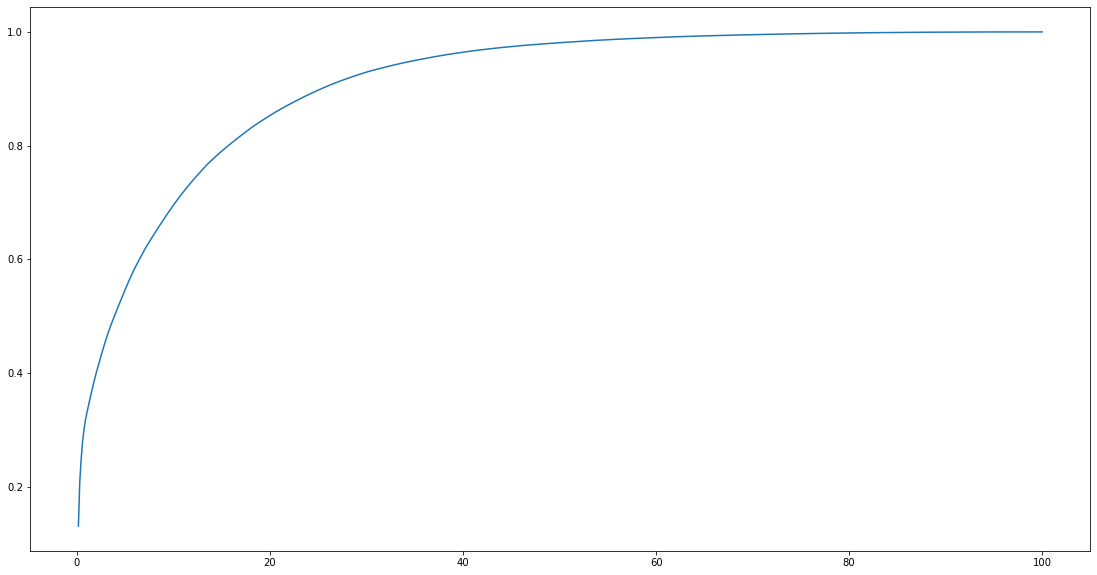

In [165]:
fig, ax = plt.subplots(figsize=(19,10))
x1= CDS['Percent of Total Count (Lrgst to Smlst)']
y1= CDS['Percent of Total Min (Lrgst to Smlst)']

ax.plot(x1,y1)
plt.show()

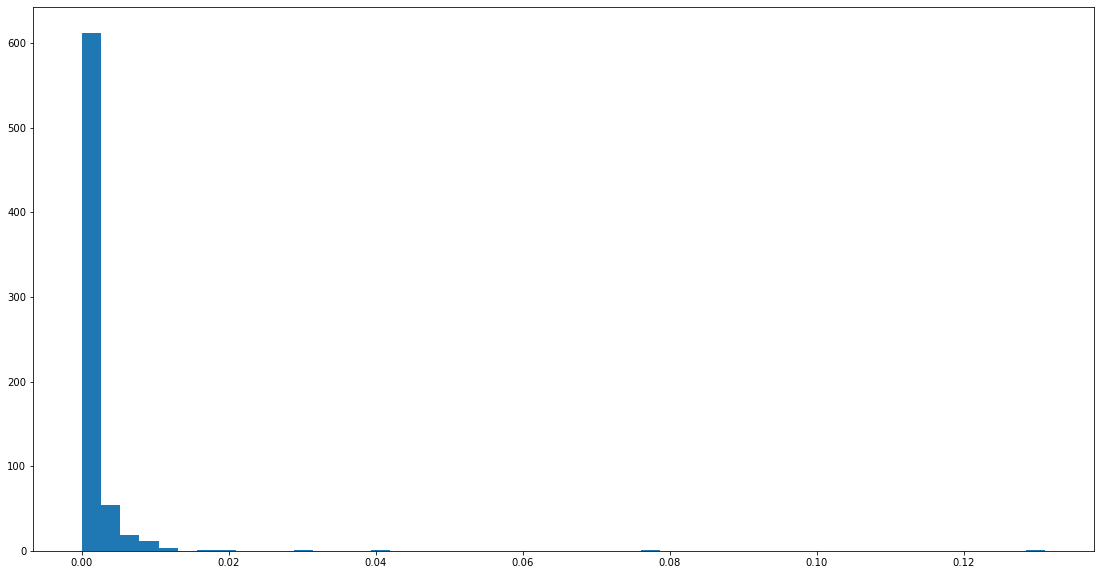

In [166]:
x= CDS['Percent']
fig, ax= plt.subplots(figsize=(19,10))
ax.hist(x, bins=50)
plt.show()

# Last Look

In [167]:
Subs.head(10)

,Subscription,Year,Month(num),Month,Billing Amount,Amazon Paid Subs,Amzn Rev,Amzn Min Streamed,Amzn Streams,Amzn Min/Stream,Amzn Min/Sub,Roku Paid Subs,Roku Rev,Roku Min Streamed,Roku Streams,Roku Min/Stream,Roku Min/Sub,Total Paid Subs,Revenue,Total Min Streamed,Total Streams,Avg Min/Stream,Min/Sub
0,CONtv,2020,4,Apr,4.99,26140,130438.60,2370535.76,107611.0,22.028749,90.686142,1208,6027.92,602496.0900,22621.0,26.634370,498.755041,27348,136466.52,2.973032e+06,130232.0,22.828735,108.711125
1,CONtv,2020,5,May,4.99,27697,138208.03,2453452.41,111122.0,22.078908,88.581883,2279,11372.21,675968.2470,23948.0,28.226501,296.607392,29976,149580.24,3.129421e+06,135070.0,23.168880,104.397540
2,CONtv,2020,6,Jun,4.99,32540,162374.60,2194000.30,98127.0,22.358783,67.424717,2613,13038.87,313176.9714,11915.0,26.284261,119.853414,35153,175413.47,2.507177e+06,110042.0,22.783821,71.321858
3,CONtv,2020,7,Jul,4.99,34989,174595.11,2665887.24,112498.0,23.697197,76.192153,2431,12130.69,266930.6748,10428.0,25.597495,109.802828,37420,186725.80,2.932818e+06,122926.0,23.858402,78.375679
4,CONtv,2020,8,Aug,4.99,35142,175358.58,2067187.04,91134.0,22.682940,58.823830,2232,11137.68,170446.8570,7242.0,23.535882,76.365079,37374,186496.26,2.237634e+06,98376.0,22.745730,59.871405
5,CONtv,2020,9,Sep,4.99,34955,174425.45,1860636.68,77417.0,24.033955,53.229486,2009,10024.91,133637.7594,6163.0,21.683881,66.519542,36964,184450.36,1.994274e+06,83580.0,23.860666,53.951803
6,CONtv,2020,10,Oct,4.99,35633,177808.67,2073036.82,82338.0,25.177158,58.177443,1844,9201.56,123828.7098,5462.0,22.670947,67.152229,37477,187010.23,2.196866e+06,87800.0,25.021247,58.619034
7,CONtv,2020,11,Nov,4.99,36933,184295.67,2291542.32,98927.0,23.163973,62.045930,1833,9146.67,128643.0390,5140.0,25.027829,70.181691,38766,193442.34,2.420185e+06,104067.0,23.256031,62.430619
8,CONtv,2020,12,Dec,4.99,36900,184131.00,2150906.94,88727.0,24.241854,58.290161,1947,9715.53,247851.6312,9438.0,26.261033,127.299246,38847,193846.53,2.398759e+06,98165.0,24.435986,61.748876
9,CONtv,2021,1,Jan,4.99,37155,185403.45,2171578.59,88212.0,24.617723,58.446470,2229,11122.71,263987.2980,10453.0,25.254692,118.433063,39384,196526.16,2.435566e+06,98665.0,24.685206,61.841506


In [168]:
Content2

,Subscription,Year,Date,Month,Month Abv,ID,TV/MOVIE,Title,Amzn Min Streamed,Amzn Streams,Amzn Min/Stream,Roku Min Streamed,Roku Streams,Roku Min/Stream,Total Min Streamed,Percentile Rank (Min),Total Streams,Min/Stream,Content Month Rev
0,CONtv,2020,Apr-2020,4,Apr,CEG10018117,MOVIE,100 Below Zero,89.02,2.0,44.510000,1015.9998,18.0,56.444433,1105.0198,0.624516,20.0,55.250990,50.722029
1,CONtv,2020,Apr-2020,4,Apr,CEG10018177,MOVIE,100 Ghost Street: The Return of Richard Speck,1.08,1.0,1.080000,845.4996,15.0,56.366640,846.5796,0.588387,16.0,52.911225,38.859245
2,CONtv,2020,Apr-2020,4,Apr,CEG10018118,MOVIE,100 Million BC,1016.65,19.0,53.507895,1116.3330,26.0,42.935885,2132.9830,0.736774,45.0,47.399622,97.907046
3,CONtv,2020,Apr-2020,4,Apr,CEG10018116,MOVIE,11_11_11,292.05,7.0,41.721429,423.0000,9.0,47.000000,715.0500,0.561290,16.0,44.690625,32.821843
4,CONtv,2020,Apr-2020,4,Apr,CEG10020241,MOVIE,13 Demons,716.62,23.0,31.157391,0.0000,0.0,NaN,716.6200,0.562581,23.0,31.157391,32.893908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121564,Screambox,2022,Jul-2022,7,Jul,1000000002910,TV,Masters of Horror,359954.10,9825.0,36.636550,14730.0000,444.0,33.175676,374684.1000,0.995757,10269.0,36.486912,10143.280791
121565,Screambox,2022,Jul-2022,7,Jul,1000000002984,TV,The Dead Zone,3749.36,129.0,29.064806,11088.0000,334.0,33.197605,14837.3600,0.886846,463.0,32.046134,401.670390
121566,Screambox,2022,Jul-2022,7,Jul,1000000001480,TV,The Island,4508.40,148.0,30.462162,8022.0000,227.0,35.339207,12530.4000,0.861386,375.0,33.414400,339.217398
121567,Screambox,2022,Jul-2022,7,Jul,1000000006058,TV,Toxic Crusaders,6283.28,447.0,14.056555,396.0000,28.0,14.142857,6679.2800,0.796322,475.0,14.061642,180.818488


In [169]:
CM

,Subscription,ID,TV/MOVIE,Title,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Metric,Average,Trend
0,CONtv,1000000000019,MOVIE,The Astrologer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000,1634.420000,1883.400000,1513.960000,1453.460000,1082.100000,654.710000,251.340000,729.080000,Minutes Streamed,1022.585556,91.035000
1,CONtv,1000000000029,MOVIE,Psychos In Love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.166200,2.666400,322.243200,606.756400,573.526600,1061.833000,863.539600,396.020000,388.596600,624.126600,846.180000,Minutes Streamed,517.150418,84.301380
2,CONtv,1000000000180,MOVIE,Guardian Of The Highlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666200,210.169800,87.732800,10.300000,1.666200,157.776600,NaN,77.890000,2.430000,NaN,280.240000,32.820000,Minutes Streamed,86.269160,3.461533
3,CONtv,1000000000196,MOVIE,The Baby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.510000,279.470000,514.330000,393.410000,118.170000,8.950000,190.010000,16.880000,115.170000,Minutes Streamed,181.988889,14.207500
4,CONtv,1000000000197,MOVIE,Bad Man's River,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.333000,597.166200,1290.176400,419.320000,571.719800,436.889800,652.556600,370.743200,207.000000,720.712800,847.960000,Minutes Streamed,556.416164,84.162700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9056,Screambox,WEAREGOINGTOEATYOU,MOVIE,We Are Going to Eat You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622449,0.709360,0.776190,0.751196,0.730769,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Percentile Rank (Min),0.631661,-0.084490
9057,Screambox,WELCOMETODAISYLAND,TV,Welcome to Daisyland,0.542056,0.464455,0.463918,0.578125,0.497326,0.220,0.388889,0.255102,0.349754,0.319048,0.129187,0.336538,0.242857,0.194444,0.284404,0.305882,0.371622,0.273936,0.261954,0.325744,0.242017,0.158940,0.192982,0.215716,0.081779,0.218440,0.199158,0.340877,Percentile Rank (Min),0.301970,-0.007451
9058,Screambox,WEREWOLFFEVER,MOVIE,Werewolf Fever,0.827103,0.848341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Percentile Rank (Min),0.837722,0.021238
9059,Screambox,WITHOUTNAME,MOVIE,Without Name,0.845794,0.739336,0.680412,0.890625,0.871658,0.780,0.661616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Percentile Rank (Min),0.781349,-0.030696


In [170]:
SubP

,Date,CONtv,Docurama,Dove,Fandor,Screambox,Number
0,4-2020,27348.0,10463.0,26531.0,44745.0,5955.0,1.0
1,5-2020,29976.0,11374.0,29572.0,48415.0,7830.0,2.0
2,6-2020,35153.0,13044.0,33655.0,56256.0,9596.0,3.0
3,7-2020,37420.0,13664.0,34869.0,56155.0,9884.0,4.0
4,8-2020,37374.0,13893.0,36957.0,55747.0,9766.0,5.0
5,9-2020,36964.0,14875.0,37103.0,55683.0,9906.0,6.0
6,10-2020,37477.0,15981.0,37610.0,56846.0,11052.0,7.0
7,11-2020,38766.0,15990.0,38076.0,57636.0,10837.0,8.0
8,12-2020,38847.0,15986.0,38909.0,58107.0,11815.0,9.0
9,1-2021,39384.0,16298.0,39306.0,59199.0,13748.0,10.0


In [171]:
SubPrj

,Subscription,intercept,Slope
0,CONtv,26506.452381,1662.111658
1,Docurama,7556.436508,1080.198960
2,Dove,28055.674603,1162.601259
3,Fandor,46672.253968,1428.814997
4,Screambox,1969.126984,1235.139026


In [172]:
SubP6

,Date,CONtv,Docurama,Dove,Fandor,Screambox,Number
22,2-2022,65728.0,32726.0,57811.0,81186.0,32379.0,23.0
23,3-2022,65804.0,34161.0,56932.0,81430.0,35896.0,24.0
24,4-2022,67317.0,35287.0,58074.0,82759.0,37562.0,25.0
25,5-2022,68751.0,35992.0,57829.0,82333.0,36820.0,26.0
26,6-2022,68908.0,36704.0,58135.0,82134.0,36312.0,27.0
27,7-2022,69543.0,38034.0,57690.0,83069.0,36268.0,28.0


In [173]:
Sub6Prj

,Subscription,intercept,Slope
0,CONtv,45948.438095,852.028571
1,Docurama,10075.800000,996.400000
2,Dove,55735.038095,78.828571
3,Fandor,74063.961905,317.171429
4,Screambox,21337.104762,570.028571


In [174]:
Rev1

,Subscription,ID,TV/MOVIE,Title,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Roku+Amzn monthly Rev Avg,Trend,All Platforms monthly Rev Avg (10/8 estimate),Yearly Avg,+1Year%_(LinReg),+2Year%_(LinReg),+3Year%_(LinReg),+4Year%_(LinReg),+1 Year Proj.,+2 Year Proj.,+3 Year Proj.,+4 Year Proj.,+1 Year Proj. (New Rev),+2 Year Proj. (New Rev),+3 Year Proj. (New Rev),+4 Year Proj. (New Rev)
0,CONtv,1000000000019,MOVIE,The Astrologer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095637,190.077015,186.282035,163.081575,151.991466,114.171922,34.381838,7.240265,17.733157,96.117212,2.204690,120.146515,1441.758183,0.337172,0.623977,0.910783,1.197589,1927.877975,2341.382670,2754.887365,3168.392060,486.119792,413.504695,413.504695,413.504695
1,CONtv,1000000000029,MOVIE,Psychos In Love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304628,0.308833,38.522890,70.563531,56.725976,114.379110,90.302210,41.783906,20.406997,17.979002,20.581339,42.896220,2.027671,53.620275,643.443301,0.337172,0.623977,0.910783,1.197589,860.394054,1044.937364,1229.480673,1414.023982,216.950753,184.543309,184.543309,184.543309
2,CONtv,1000000000180,MOVIE,Guardian Of The Highlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119474,20.220979,10.161562,1.231324,0.193773,15.605260,NaN,8.145126,0.256388,NaN,8.072778,0.798269,6.480493,0.075422,8.100617,97.207401,0.337172,0.623977,0.910783,1.197589,129.982967,157.862619,185.742271,213.621923,32.775567,27.879652,27.879652,27.879652
3,CONtv,1000000000196,MOVIE,The Baby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180514,32.501330,50.870999,42.377554,12.357293,0.944311,9.978300,0.486256,2.801239,16.944200,0.327591,21.180250,254.162996,0.337172,0.623977,0.910783,1.197589,339.859519,412.754956,485.650393,558.545829,85.696523,72.895437,72.895437,72.895437
4,CONtv,1000000000197,MOVIE,Bad Man's River,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609314,69.166168,154.235445,48.765369,56.547270,47.061135,68.239260,39.116961,10.870523,20.761327,20.624633,48.727037,2.001532,60.908796,730.905553,0.337172,0.623977,0.910783,1.197589,977.346087,1186.974082,1396.602078,1606.230074,246.440533,209.627996,209.627996,209.627996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9056,Screambox,WEAREGOINGTOEATYOU,MOVIE,We Are Going to Eat You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.309083,26.009801,70.937399,63.175060,30.856646,7.887542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.029255,-4.284308,47.536569,570.438826,0.416529,0.825200,1.233871,1.642541,808.043363,1041.164988,1274.286612,1507.408236,237.604538,233.121624,233.121624,233.121624
9057,Screambox,WELCOMETODAISYLAND,TV,Welcome to Daisyland,32.395970,20.035365,19.292995,22.000019,10.858643,5.286587,20.26157,5.830574,5.722410,8.342684,2.811620,5.165193,13.859854,6.321581,7.883003,25.092964,21.559306,11.094253,17.997780,25.908594,7.998668,5.180708,5.879053,7.676101,2.247087,6.537971,3.595854,9.908189,12.026593,-0.832881,15.033241,180.398890,0.416529,0.825200,1.233871,1.642541,255.540331,329.264068,402.987806,476.711543,75.141440,73.723738,73.723738,73.723738
9058,Screambox,WEREWOLFFEVER,MOVIE,Werewolf Fever,131.201122,110.220321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.710721,-20.980801,150.888402,1810.660821,0.416529,0.825200,1.233871,1.642541,2564.854274,3304.818267,4044.782261,4784.746254,754.193452,739.963993,739.963993,739.963993
9059,Screambox,WITHOUTNAME,MOVIE,Without Name,138.374532,61.684816,54.575049,139.753988,88.320652,53.487103,65.62664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
output= pd.ExcelWriter('Amazon_Roku SVOD '+Monthsinc+' out.xlsx', engine='xlsxwriter')

Subs.to_excel(output, sheet_name= 'Subscriptions',index=False)
Content2.to_excel(output, sheet_name= 'Content',index=False)
CM.to_excel(output, sheet_name='Monthly Title Trend', index=False)
SubP.to_excel(output, sheet_name='Sub Projections', index=False)
SubPrj.to_excel(output, sheet_name='Sub Slp_int', index=False)
SubP6.to_excel(output, sheet_name='Sub6 Projections', index=False)
Sub6Prj.to_excel(output, sheet_name='Sub6 Slp_int', index=False)
Rev1.to_excel(output, sheet_name='Revenue', index=False)

output.save()